# Telecom Churn Case Study

In [1]:
# Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Importing the PCA module
from sklearn.decomposition import PCA

# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2]:
#Set option to display max 500 columns 
pd.set_option('display.max_columns', 500)

# Data Analysis - Analyse & Visualize the features in the Telecom Churn Data Set

In [3]:
# Read the data from the CSV file into a DataFrame
telco_df = pd.read_csv("telecom_churn_data.csv")

In [4]:
#Get the shape (row and column count of the data)
telco_df.shape

(99999, 226)

In [5]:
#Get the numerical columns description
telco_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
#Get the columns wise info - Datatypes and missing values
telco_df.info(verbose = True, null_counts = True) 
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [7]:
#Check the sample values using df.head()
telco_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
telco_null_fields = telco_df.isna().mean() * 100
telco_null_fields = telco_null_fields.round(2)
print(telco_null_fields[telco_null_fields > 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [9]:
#Check the sample values for September CHurn indiacators
telco_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00          0.0         0.00
1          188.04           72.11          0.0         0.00
2          517.74          124.94          0.0         8.42
3          305.38          362.54          0.0         0.00
4          205.31          104.59          0.0         0.00

In [10]:
telco_df.loc[(telco_df['total_ic_mou_9'] == 0.00) & (telco_df['total_og_mou_9'] == 0.00) & (telco_df['vol_2g_mb_9'] == 0.00) & (telco_df['vol_3g_mb_9'] == 0.00)].shape


(10191, 226)

In [11]:
telco_df['avg_rech_amt_goodph'] = telco_df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [12]:
telco_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head()

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
0               362               252                307.0
1                74               384                229.0
2               168               315                241.5
3               230               310                270.0
4               196               350                273.0

In [13]:
hvtelco_df = telco_df[telco_df['avg_rech_amt_goodph'] >= telco_df['avg_rech_amt_goodph'].quantile(0.70)]
hvtelco_df[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_goodph']].head(10)

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_goodph
7               1580               790               1185.0
8                437               601                519.0
13               507               253                380.0
16               570               348                459.0
17               816                 0                408.0
21               600               680                640.0
24               440               330                385.0
33              1058              2806               1932.0
38               420               636                528.0
41               496               510                503.0

In [14]:
hvtelco_df.shape

(30011, 227)

In [15]:
#Get the columns wise info - Datatypes and missing values
hvtelco_df.info(verbose = True, null_counts = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 227 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             30011 non-null  int64  
 1    circle_id                 30011 non-null  int64  
 2    loc_og_t2o_mou            29897 non-null  float64
 3    std_og_t2o_mou            29897 non-null  float64
 4    loc_ic_t2o_mou            29897 non-null  float64
 5    last_date_of_month_6      30011 non-null  object 
 6    last_date_of_month_7      29980 non-null  object 
 7    last_date_of_month_8      29854 non-null  object 
 8    last_date_of_month_9      29651 non-null  object 
 9    arpu_6                    30011 non-null  float64
 10   arpu_7                    30011 non-null  float64
 11   arpu_8                    30011 non-null  float64
 12   arpu_9                    30011 non-null  float64
 13   onnet_mou_6               29695 non-null  fl

In [16]:
september_churn_count = ((hvtelco_df['total_ic_mou_9'] == 0) &
                         (hvtelco_df['total_og_mou_9'] == 0) &
                         (hvtelco_df['vol_2g_mb_9'] == 0) &
                         (hvtelco_df['vol_3g_mb_9'] == 0)).sum()

print(september_churn_count)

2593


In [17]:
hvtelco_df['churn'] = ((hvtelco_df['total_ic_mou_9'] == 0) &
                       (hvtelco_df['total_og_mou_9'] == 0) &
                       (hvtelco_df['vol_2g_mb_9'] == 0) &
                       (hvtelco_df['vol_3g_mb_9'] == 0)).astype(int)

In [18]:
hvtelco_df.loc[hvtelco_df['churn'].isnull(), 'churn'] = 0

In [19]:
hvtelco_df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [20]:
churn_month_cols = np.core.defchararray.find(hvtelco_df.columns.values.astype(str), '_9') >= 0
churn_month_cols

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,

In [21]:
churn_month_col_list=list(hvtelco_df.columns[churn_month_cols])

In [22]:
hvtelco_df[churn_month_col_list].head()

last_date_of_month_9   arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
7             9/30/2014  500.000          NaN           NaN            NaN   
8             9/30/2014  166.787        33.46        108.71           0.00   
13            9/30/2014  322.732       244.81        214.06         136.78   
16            9/30/2014  206.490        31.34        224.39           0.00   
17            9/30/2014  257.583       558.51         87.89           0.00   

    roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
7             NaN               NaN               NaN               NaN   
8            0.00             26.13             34.58              0.00   
13          12.78              6.14            108.24              5.29   
16           0.00             26.88            201.49              4.66   
17          17.98             36.41              9.38              0.00   

    loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  \
7                NaN           NaN               NaN               NaN   
8                0.0         60.71              7.33             74.13   
13               0.0        119.69            230.38             96.01   
16               0.0        233.04              4.46             13.79   
17               0.0         45.79            504.11             78.51   

    std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  \
7                NaN               NaN           NaN           NaN   
8               0.00               0.0         81.46           0.0   
13              0.00               0.0        326.39           0.0   
16              4.43               0.0         22.69           0.0   
17              0.00               0.0        582.63           0.0   

    spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
7            NaN          NaN            0.00               NaN   
8           0.00          0.0          142.18              4.03   
13          0.00          0.0          446.09             24.98   
16          0.00          0.0          255.74             50.23   
17          2.64          0.0          631.08             40.91   

    loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  \
7                NaN               NaN           NaN               NaN   
8              17.34              0.00         21.38              0.00   
13            104.79              8.51        138.29             62.39   
16            172.86             65.21        288.31             16.66   
17             43.86              0.71         85.49              0.00   

    std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_9  \
7                NaN               NaN               NaN           NaN   
8              13.53               0.0               0.0         13.53   
13            151.51               0.0               0.0        213.91   
16             29.58               0.0               0.0         46.24   
17              1.63               0.0               0.0          1.63   

    total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  total_rech_num_9  \
7             0.00           NaN           NaN          NaN                 3   
8            34.91           0.0          0.00         0.00                15   
13          631.86           0.0        259.33        20.31                 7   
16          334.56           0.0          0.00         0.00                 1   
17           87.13           0.0          0.00         0.00                10   

    total_rech_amt_9  max_rech_amt_9 date_of_last_rech_9  last_day_rch_amt_9  \
7                  0               0           9/30/2014                   0   
8                186              36           9/30/2014                   0   
13               353             130           9/26/2014                   0   
16               220             220           9/10/2014                 220   
17               335             130 

In [23]:
hvtelco_df.drop(churn_month_col_list,axis=1,inplace=True)
hvtelco_df.drop('sep_vbc_3g',axis=1,inplace=True)

In [24]:
hvtelco_df.shape

(30011, 173)

In [25]:
hvtelco_null_fields = hvtelco_df.isnull().mean() * 100
hvtelco_null_fields = hvtelco_null_fields.round(2)

In [26]:
hvtelco_null_fields

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
                       ... 
aug_vbc_3g             0.00
jul_vbc_3g             0.00
jun_vbc_3g             0.00
avg_rech_amt_goodph    0.00
churn                  0.00
Length: 173, dtype: float64

In [27]:
print(hvtelco_null_fields[hvtelco_null_fields > 60])

date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.14
date_of_last_rech_data_8    60.83
total_rech_data_6           62.02
total_rech_data_7           61.14
total_rech_data_8           60.83
max_rech_data_6             62.02
max_rech_data_7             61.14
max_rech_data_8             60.83
count_rech_2g_6             62.02
count_rech_2g_7             61.14
count_rech_2g_8             60.83
count_rech_3g_6             62.02
count_rech_3g_7             61.14
count_rech_3g_8             60.83
av_rech_amt_data_6          62.02
av_rech_amt_data_7          61.14
av_rech_amt_data_8          60.83
arpu_3g_6                   62.02
arpu_3g_7                   61.14
arpu_3g_8                   60.83
arpu_2g_6                   62.02
arpu_2g_7                   61.14
arpu_2g_8                   60.83
night_pck_user_6            62.02
night_pck_user_7            61.14
night_pck_user_8            60.83
fb_user_6                   62.02
fb_user_7                   61.14
fb_user_8     

In [28]:
hvtelco_df[list(hvtelco_null_fields[hvtelco_null_fields > 60].index)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_data_6  11397 non-null  object 
 1   date_of_last_rech_data_7  11662 non-null  object 
 2   date_of_last_rech_data_8  11754 non-null  object 
 3   total_rech_data_6         11397 non-null  float64
 4   total_rech_data_7         11662 non-null  float64
 5   total_rech_data_8         11754 non-null  float64
 6   max_rech_data_6           11397 non-null  float64
 7   max_rech_data_7           11662 non-null  float64
 8   max_rech_data_8           11754 non-null  float64
 9   count_rech_2g_6           11397 non-null  float64
 10  count_rech_2g_7           11662 non-null  float64
 11  count_rech_2g_8           11754 non-null  float64
 12  count_rech_3g_6           11397 non-null  float64
 13  count_rech_3g_7           11662 non-null  float64
 14  count_

In [29]:
print(list(hvtelco_null_fields[hvtelco_null_fields > 60].index))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [30]:
hvtelco_df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1,inplace=True)

In [31]:
hvtelco_df[['fb_user_6', 'fb_user_7', 'fb_user_8']].describe()

fb_user_6     fb_user_7     fb_user_8
count  11397.000000  11662.000000  11754.000000
mean       0.897605      0.889813      0.837332
std        0.303181      0.313136      0.369078
min        0.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        1.000000      1.000000      1.000000
75%        1.000000      1.000000      1.000000
max        1.000000      1.000000      1.000000

In [32]:
hvtelco_df[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8
count      11397.000000      11662.000000      11754.000000
mean           0.027288          0.025382          0.023737
std            0.162928          0.157288          0.152234
min            0.000000          0.000000          0.000000
25%            0.000000          0.000000          0.000000
50%            0.000000          0.000000          0.000000
75%            0.000000          0.000000          0.000000
max            1.000000          1.000000          1.000000

In [33]:
hvtelco_df[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']].describe()

arpu_2g_6     arpu_2g_7     arpu_2g_8
count  11397.000000  11662.000000  11754.000000
mean     132.278321    133.431682    122.137984
std      225.619174    230.794261    212.619574
min      -15.320000    -15.480000    -24.430000
25%        0.010000      0.000000      0.000000
50%       40.200000     35.000000     21.495000
75%      212.170000    212.170000    212.170000
max     6433.760000   4809.360000   3467.170000

In [34]:
hvtelco_df[['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8']].describe()

arpu_3g_6     arpu_3g_7     arpu_3g_8
count  11397.000000  11662.000000  11754.000000
mean     142.191067    143.817963    133.098754
std      255.296779    259.492088    240.334682
min      -30.280000    -26.040000    -20.040000
25%        0.000000      0.000000      0.000000
50%       22.070000     21.910000     11.415000
75%      212.170000    212.170000    212.170000
max     6362.280000   4980.900000   3716.900000

In [35]:
null_threshold = 60
columns_with_high_null = hvtelco_df.columns[hvtelco_df.isnull().mean() * 100 > null_threshold]

hvtelco_df[columns_with_high_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_data_6   11397 non-null  float64
 1   total_rech_data_7   11662 non-null  float64
 2   total_rech_data_8   11754 non-null  float64
 3   max_rech_data_6     11397 non-null  float64
 4   max_rech_data_7     11662 non-null  float64
 5   max_rech_data_8     11754 non-null  float64
 6   count_rech_2g_6     11397 non-null  float64
 7   count_rech_2g_7     11662 non-null  float64
 8   count_rech_2g_8     11754 non-null  float64
 9   count_rech_3g_6     11397 non-null  float64
 10  count_rech_3g_7     11662 non-null  float64
 11  count_rech_3g_8     11754 non-null  float64
 12  av_rech_amt_data_6  11397 non-null  float64
 13  av_rech_amt_data_7  11662 non-null  float64
 14  av_rech_amt_data_8  11754 non-null  float64
 15  arpu_3g_6           11397 non-null  float64
 16  arpu

In [36]:
null_rech_data_6_shape = hvtelco_df[hvtelco_df['total_rech_data_6'].isnull()][['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']].shape

print(null_rech_data_6_shape)

(18614, 9)


In [37]:
columns_to_fill = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']
hvtelco_df[columns_to_fill] = hvtelco_df[columns_to_fill].fillna(0)


In [38]:
null_rech_data_6_shape = hvtelco_df.loc[hvtelco_df['total_rech_data_6'].isnull(), ['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']].shape

print(null_rech_data_6_shape)

(0, 9)


In [39]:
null_rech_data_7_shape = hvtelco_df.loc[hvtelco_df['total_rech_data_7'].isnull(), ['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']].shape

print(null_rech_data_7_shape)

(18349, 9)


In [40]:
columns_to_fill = ['total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']
hvtelco_df[columns_to_fill] = hvtelco_df[columns_to_fill].fillna(0)

In [41]:
null_rech_data_7_shape = hvtelco_df.loc[hvtelco_df['total_rech_data_7'].isnull(), ['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']].shape

print(null_rech_data_7_shape)

(0, 9)


In [42]:
null_rech_data_8_shape = hvtelco_df.loc[hvtelco_df['total_rech_data_8'].isnull(), ['total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']].shape

print(null_rech_data_8_shape)

(18257, 9)


In [43]:
hvtelco_df.loc[hvtelco_df['total_rech_data_8'].isna(),['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']] = 0

In [44]:
null_rech_data_8_shape = hvtelco_df[hvtelco_df['total_rech_data_8'].isna()][['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']].shape

print(null_rech_data_8_shape)

(0, 9)


In [45]:
hvtelco_null_fields = hvtelco_df.isnull().mean() * 100
null_columns = hvtelco_null_fields[hvtelco_null_fields > 0].index.tolist()
hvtelco_df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc_og_t2o_mou        29897 non-null  float64
 1   std_og_t2o_mou        29897 non-null  float64
 2   loc_ic_t2o_mou        29897 non-null  float64
 3   last_date_of_month_7  29980 non-null  object 
 4   last_date_of_month_8  29854 non-null  object 
 5   onnet_mou_6           29695 non-null  float64
 6   onnet_mou_7           29708 non-null  float64
 7   onnet_mou_8           29073 non-null  float64
 8   offnet_mou_6          29695 non-null  float64
 9   offnet_mou_7          29708 non-null  float64
 10  offnet_mou_8          29073 non-null  float64
 11  roam_ic_mou_6         29695 non-null  float64
 12  roam_ic_mou_7         29708 non-null  float64
 13  roam_ic_mou_8         29073 non-null  float64
 14  roam_og_mou_6         29695 non-null  float64
 15  roam_og_mou_7      

In [46]:
hvtelco_df.shape

(30011, 170)

In [47]:
print(list(hvtelco_df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mo

In [48]:
hvtelco_df['last_date_of_month_6'].value_counts()

6/30/2014    30011
Name: last_date_of_month_6, dtype: int64

In [49]:
print(hvtelco_df['last_date_of_month_7'].value_counts())
print(hvtelco_df['last_date_of_month_8'].value_counts())

7/31/2014    29980
Name: last_date_of_month_7, dtype: int64
8/31/2014    29854
Name: last_date_of_month_8, dtype: int64


In [50]:
hvtelco_df['last_date_of_month_7'].mode()[0]

'7/31/2014'

In [51]:
hvtelco_df['last_date_of_month_8'].mode()[0]

'8/31/2014'

In [52]:
hvtelco_df.loc[hvtelco_df['last_date_of_month_7'].isna(),'last_date_of_month_7']=hvtelco_df['last_date_of_month_7'].mode()[0]

In [53]:
hvtelco_df.loc[hvtelco_df['last_date_of_month_8'].isna(),'last_date_of_month_8']=hvtelco_df['last_date_of_month_8'].mode()[0]

In [54]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_7'].isna()].head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
490      7000369789        109             0.0             0.0   
603      7001967148        109             0.0             0.0   
679      7000066601        109             0.0             0.0   
1374     7001189556        109             0.0             0.0   
1555     7002024450        109             0.0             0.0   
2777     7001528357        109             0.0             0.0   
3506     7002324263        109             NaN             NaN   
4190     7000293582        109             NaN             NaN   
4694     7002083254        109             0.0             0.0   
4960     7001953395        109             0.0             0.0   

      loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
490              0.0            6/30/2014            7/31/2014   
603              0.0            6/30/2014            7/31/2014   
679              0.0            6/30/2014            7/31/2014   
1374             0.0            6/30/2014            7/31/2014   
1555             0.0            6/30/2014            7/31/2014   
2777             0.0            6/30/2014            7/31/2014   
3506             NaN            6/30/2014            7/31/2014   
4190             NaN            6/30/2014            7/31/2014   
4694             0.0            6/30/2014            7/31/2014   
4960             0.0            6/30/2014            7/31/2014   

     last_date_of_month_8    arpu_6   arpu_7    arpu_8  onnet_mou_6  \
490             8/31/2014   679.329     0.00     0.000       189.51   
603             8/31/2014   176.964  1025.01  1345.270       218.36   
679             8/31/2014   866.416     0.00   205.869        31.11   
1374            8/31/2014   945.091    25.00     0.000      2075.16   
1555            8/31/2014  1138.800     0.00     0.000        75.79   
2777            8/31/2014 -2041.228  3972.71  -945.808      1501.31   
3506            8/31/2014   996.558     0.00     0.000          NaN   
4190            8/31/2014  2502.516     0.00     0.000          NaN   
4694            8/31/2014   331.684   236.40   101.038        12.56   
4960            8/31/2014   546.492   312.43     0.330       374.74   

      onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
490           NaN          NaN        920.18           NaN           NaN   
603        197.14       310.79        490.39       1507.81       1892.74   
679          0.00         9.59       1579.26          0.00        361.43   
1374         6.26         0.00        168.66          8.46          1.48   
1555          NaN          NaN       1014.61           NaN           NaN   
2777      2005.94      1722.39       4104.01       4619.03       5738.13   
3506          NaN          NaN           NaN           NaN           NaN   
4190          NaN          NaN           NaN           NaN           NaN   
4694        40.59        10.54        424.36        436.28        159.01   
4960       113.14          NaN       1026.98        207.79           NaN   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
490             0.0            NaN            NaN           0.00   
603             0.0            0.0            0.0           0.00   
679             0.0            0.0            0.0           0.00   
1374            0.0            0.0            0.0           0.00   
1555            0.0            NaN            NaN           0.00   
2777            0.0            0.0            0.0           0.00   
3506            NaN            NaN            NaN            NaN   
4190            NaN            NaN            NaN            NaN   
4694           13.1            0.0            0.0           3.85   
4960            0.0            0.0            NaN           0.00   

      roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
490             NaN            NaN             18.44               NaN   
603             0.0            0.0  

In [55]:
hvtelco_df['circle_id'].value_counts()

109    30011
Name: circle_id, dtype: int64

In [56]:
hvtelco_df.drop('circle_id',axis=1,inplace=True)

In [57]:
hvtelco_null_fields=round((hvtelco_df.isna().sum())/len(hvtelco_df.index) * 100,2)
print(hvtelco_null_fields[hvtelco_null_fields > 0])

loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
onnet_mou_6            1.05
onnet_mou_7            1.01
                       ... 
ic_others_7            1.01
ic_others_8            3.13
date_of_last_rech_6    0.21
date_of_last_rech_7    0.38
date_of_last_rech_8    1.98
Length: 93, dtype: float64


In [58]:
hvtelco_df['loc_og_t2o_mou'].value_counts()

0.0    29897
Name: loc_og_t2o_mou, dtype: int64

In [59]:
hvtelco_df['std_og_t2o_mou'].value_counts()

0.0    29897
Name: std_og_t2o_mou, dtype: int64

In [60]:
hvtelco_df['loc_ic_t2o_mou'].value_counts()

0.0    29897
Name: loc_ic_t2o_mou, dtype: int64

In [61]:
hvtelco_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
hvtelco_df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)

In [62]:
hvtelco_df.loc[(hvtelco_df['date_of_last_rech_6'].isna()) | (hvtelco_df['date_of_last_rech_7'].isna()) | (hvtelco_df['date_of_last_rech_8'].isna())]

mobile_number last_date_of_month_6 last_date_of_month_7  \
188       7000340381            6/30/2014            7/31/2014   
191       7000608224            6/30/2014            7/31/2014   
490       7000369789            6/30/2014            7/31/2014   
578       7000248548            6/30/2014            7/31/2014   
588       7001967063            6/30/2014            7/31/2014   
...              ...                  ...                  ...   
99436     7000180826            6/30/2014            7/31/2014   
99515     7000064852            6/30/2014            7/31/2014   
99672     7000373488            6/30/2014            7/31/2014   
99713     7001441981            6/30/2014            7/31/2014   
99790     7000008246            6/30/2014            7/31/2014   

      last_date_of_month_8    arpu_6    arpu_7   arpu_8  onnet_mou_6  \
188              8/31/2014   734.641   183.668     0.00         4.38   
191              8/31/2014   213.833   618.449     0.00         0.00   
490              8/31/2014   679.329     0.000     0.00       189.51   
578              8/31/2014   569.612   237.289     0.00       718.01   
588              8/31/2014   514.479 -2014.045  3269.79      1161.33   
...                    ...       ...       ...      ...          ...   
99436            8/31/2014   483.027   230.662     0.00        68.04   
99515            8/31/2014  1061.185  1118.968   366.43       183.48   
99672            8/31/2014   428.790   305.230   422.49       173.44   
99713            8/31/2014   432.038   288.151     0.40        56.43   
99790            8/31/2014  1942.949     0.000     0.00       154.31   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
188           0.98          NaN        105.16         39.39           NaN   
191         169.34         0.00          0.00        302.33          0.00   
490            NaN          NaN        920.18           NaN           NaN   
578         212.73          NaN        487.06        139.71           NaN   
588        1384.58      1649.49       4129.68       4211.83       3695.91   
...            ...          ...           ...           ...           ...   
99436        57.24          NaN        230.38        139.71           NaN   
99515       332.66       320.58         50.33        153.84         41.09   
99672        96.14       116.34        371.18        348.56        253.31   
99713        33.54         0.00        386.14        102.11          0.00   
99790          NaN          NaN        430.63           NaN           NaN   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
188              0.0           0.00            NaN            0.0   
191              0.0           0.00           0.00            0.0   
490              0.0            NaN            NaN            0.0   
578              0.0           2.01            NaN            0.0   
588              0.0           0.00           0.00            0.0   
...              ...            ...            ...            ...   
99436            0.0           0.00            NaN            0.0   
99515            0.0           0.00           0.00            0.0   
99672            0.0           0.00           1.68            0.0   
99713            0.0           0.00           0.00            0.0   
99790            0.0            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
188              0.0            NaN              4.38              0.98   
191              0.0           0.00              0.00             31.01   
490              NaN            NaN             18.44               NaN   
578              6.3            NaN             11.28             27.89   
588              0.0           0.00            277.11            346.96   
...              ...            ...               ...               ...   
99436            0.0            NaN             68.04             57.2

In [63]:
hvtelco_df.loc[(hvtelco_df['date_of_last_rech_6'].isna()) | (hvtelco_df['date_of_last_rech_7'].isna()) | (hvtelco_df['date_of_last_rech_8'].isna())].shape

(694, 163)

In [64]:
hvtelco_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1).shape

(30011,)

In [65]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_6'].isna(),'date_of_last_rech_6']='01/01/0001'

In [66]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_7'].isna(),'date_of_last_rech_7']='01/01/0001'

In [67]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_8'].isna(),'date_of_last_rech_8']='01/01/0001'

In [68]:
hvtelco_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1).head()

7     8/26/2014
8     8/30/2014
13    8/30/2014
16    8/14/2014
17    8/25/2014
dtype: object

In [69]:
hvtelco_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
7            6/27/2014           7/25/2014           8/26/2014
8            6/25/2014           7/31/2014           8/30/2014
13           6/20/2014           7/22/2014           8/30/2014
16           6/30/2014           7/31/2014           8/14/2014
17           6/30/2014           7/30/2014           8/25/2014

In [70]:
hvtelco_df['date_of_last_rech']=hvtelco_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].max(axis=1)

In [71]:
hvtelco_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech']].head(20)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
7            6/27/2014           7/25/2014           8/26/2014   
8            6/25/2014           7/31/2014           8/30/2014   
13           6/20/2014           7/22/2014           8/30/2014   
16           6/30/2014           7/31/2014           8/14/2014   
17           6/30/2014           7/30/2014           8/25/2014   
21           6/30/2014           7/31/2014           8/31/2014   
24           6/23/2014           7/17/2014           8/31/2014   
33           6/30/2014           7/30/2014           8/26/2014   
38           6/30/2014           7/28/2014           8/24/2014   
41           6/24/2014           7/22/2014           8/31/2014   
48           6/29/2014           7/23/2014           8/28/2014   
53           6/29/2014           7/31/2014           8/26/2014   
56           6/28/2014           7/30/2014           8/31/2014   
57           6/29/2014           7/26/2014           8/24/2014   
60           6/26/2014           7/28/2014           8/27/2014   
61           6/28/2014           7/29/2014           8/23/2014   
69           6/30/2014           7/28/2014           8/31/2014   
73           6/30/2014           7/31/2014           8/31/2014   
74           6/21/2014           7/31/2014           8/31/2014   
77           6/17/2014           7/27/2014           8/27/2014   

   date_of_last_rech  
7          8/26/2014  
8          8/30/2014  
13         8/30/2014  
16         8/14/2014  
17         8/25/2014  
21         8/31/2014  
24         8/31/2014  
33         8/26/2014  
38         8/24/2014  
41         8/31/2014  
48         8/28/2014  
53         8/26/2014  
56         8/31/2014  
57         8/24/2014  
60         8/27/2014  
61         8/23/2014  
69         8/31/2014  
73         8/31/2014  
74         8/31/2014  
77         8/27/2014

In [72]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_8'] == '01/01/0001'][['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech']].head(20)

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
188            6/28/2014            7/7/2014          01/01/0001   
191            6/12/2014           7/30/2014          01/01/0001   
490            6/22/2014          01/01/0001          01/01/0001   
578            6/30/2014           7/28/2014          01/01/0001   
588             6/2/2014           7/21/2014          01/01/0001   
603             6/7/2014          01/01/0001          01/01/0001   
690            6/30/2014           7/24/2014          01/01/0001   
723            6/30/2014           7/24/2014          01/01/0001   
845            6/23/2014            7/5/2014          01/01/0001   
1442           6/14/2014           7/16/2014          01/01/0001   
1524           6/29/2014           7/26/2014          01/01/0001   
1555           6/21/2014          01/01/0001          01/01/0001   
1802           6/25/2014           7/30/2014          01/01/0001   
1913           6/30/2014           7/27/2014          01/01/0001   
1952           6/29/2014           7/30/2014          01/01/0001   
2218           6/24/2014           7/30/2014          01/01/0001   
2360           6/28/2014           7/11/2014          01/01/0001   
2714           6/22/2014            7/8/2014          01/01/0001   
3170           6/28/2014           7/27/2014          01/01/0001   
3406           6/30/2014           7/15/2014          01/01/0001   

     date_of_last_rech  
188           7/7/2014  
191          7/30/2014  
490          6/22/2014  
578          7/28/2014  
588          7/21/2014  
603           6/7/2014  
690          7/24/2014  
723          7/24/2014  
845           7/5/2014  
1442         7/16/2014  
1524         7/26/2014  
1555         6/21/2014  
1802         7/30/2014  
1913         7/27/2014  
1952         7/30/2014  
2218         7/30/2014  
2360         7/11/2014  
2714          7/8/2014  
3170         7/27/2014  
3406         7/15/2014

In [73]:
hvtelco_df['date_of_last_rech'] = pd.to_datetime(hvtelco_df['date_of_last_rech'])
hvtelco_df['last_date_of_month_8'] = pd.to_datetime(hvtelco_df['last_date_of_month_8'])

In [74]:
hvtelco_df['days_since_last_rech'] = (hvtelco_df['last_date_of_month_8'] - hvtelco_df['date_of_last_rech']).dt.days

In [75]:
hvtelco_df['days_since_last_rech'].describe()

count    30011.000000
mean         4.879444
std          7.690653
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         85.000000
Name: days_since_last_rech, dtype: float64

In [76]:
hvtelco_df[['og_others_6','og_others_7','og_others_8','ic_others_6','ic_others_7','ic_others_8']].head(10)

og_others_6  og_others_7  og_others_8  ic_others_6  ic_others_7  \
7          0.00          0.0          0.0        15.74        15.19   
8          0.00          0.0          0.0         0.00         0.00   
13         0.00          0.0          0.0        83.48        16.24   
16         0.00          0.0          0.0         0.00         0.00   
17         0.93          0.0          0.0         0.00         0.00   
21         0.00          0.0          0.0         0.00         0.00   
24         0.00          0.0          0.0         0.00         0.00   
33         0.00          0.0          0.0         1.23         0.65   
38         0.00          0.0          0.0         0.00         0.00   
41         0.00          0.0          0.0         0.56         0.00   

    ic_others_8  
7         15.14  
8          0.00  
13        21.44  
16         0.00  
17         0.00  
21         0.00  
24         0.00  
33         0.20  
38         0.00  
41         0.35

In [77]:
hvtelco_df.loc[hvtelco_df['onnet_mou_6'].isna(),['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']].shape

(316, 28)

In [78]:
hvtelco_df.loc[hvtelco_df['onnet_mou_6'].isna(),['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']]=0

In [79]:
hvtelco_df.loc[hvtelco_df['onnet_mou_6'].isna(),['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']].shape

(0, 28)

In [80]:
hvtelco_df.loc[hvtelco_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']].shape

(303, 28)

In [81]:
hvtelco_df.loc[hvtelco_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']]=0

In [82]:
hvtelco_df.loc[hvtelco_df['onnet_mou_7'].isna(),['onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7']].shape

(0, 28)

In [83]:
hvtelco_df.loc[hvtelco_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']].shape

(938, 28)

In [84]:
hvtelco_df.loc[hvtelco_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']]=0

In [85]:
hvtelco_df.loc[hvtelco_df['onnet_mou_8'].isna(),['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8']].shape

(0, 28)

In [86]:
hvtelco_null_fields=round((hvtelco_df.isna().sum())/len(hvtelco_df.index) * 100,2)
print(hvtelco_null_fields[hvtelco_null_fields > 0])

Series([], dtype: float64)


In [87]:
#Get the columns wise info - Datatypes and missing values
hvtelco_df.info(verbose = True, null_counts = True) 
hvtelco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 165 columns):
 #    Column                Non-Null Count  Dtype         
---   ------                --------------  -----         
 0    mobile_number         30011 non-null  int64         
 1    last_date_of_month_6  30011 non-null  object        
 2    last_date_of_month_7  30011 non-null  object        
 3    last_date_of_month_8  30011 non-null  datetime64[ns]
 4    arpu_6                30011 non-null  float64       
 5    arpu_7                30011 non-null  float64       
 6    arpu_8                30011 non-null  float64       
 7    onnet_mou_6           30011 non-null  float64       
 8    onnet_mou_7           30011 non-null  float64       
 9    onnet_mou_8           30011 non-null  float64       
 10   offnet_mou_6          30011 non-null  float64       
 11   offnet_mou_7          30011 non-null  float64       
 12   offnet_mou_8          30011 non-null  float64       
 13  

In [88]:
hvtelco_df.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
13     7002191713            6/30/2014            7/31/2014   
16     7000875565            6/30/2014            7/31/2014   
17     7000187447            6/30/2014            7/31/2014   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7            2014-08-31  1069.180  1349.850  3171.480        57.84   
8            2014-08-31   378.721   492.223   137.362       413.69   
13           2014-08-31   492.846   205.671   593.260       501.76   
16           2014-08-31   430.975   299.869   187.894        50.51   
17           2014-08-31   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
13           1.44             49.63              6.19             36.01   
16           0.00             42.61             65.16             67.38   
17          13.34             38.99              0.00              0.00   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
13            151.13             47.28            294.46              4.54   
16            273.29            145.99            128.28              0.00   
17             58.54              0.00              0.00              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13              0.00             23.51               0.0               0.0   
16              4.48             10.26               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
13              0.49        205.31         53.48        353.99   
16              0.00        315.91        215.64        205.93   
17              0.00         97.54          0.00          0.00   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
13            446.41             85.98            498.23            255.36   
16              7.89              2.58              3.23             22.99   
17           1146.91              0.81              0.00              1.55   

    std_og_t2m_mo

In [89]:
hvtelco_df.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6'],axis=1,inplace=True)

In [90]:
hvtelco_df.drop(['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7'],axis=1,inplace=True)

In [91]:
hvtelco_df.drop(['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8'],axis=1,inplace=True)

In [92]:
hvtelco_df.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
13     7002191713            6/30/2014            7/31/2014   
16     7000875565            6/30/2014            7/31/2014   
17     7000187447            6/30/2014            7/31/2014   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7            2014-08-31  1069.180  1349.850  3171.480        57.84   
8            2014-08-31   378.721   492.223   137.362       413.69   
13           2014-08-31   492.846   205.671   593.260       501.76   
16           2014-08-31   430.975   299.869   187.894        50.51   
17           2014-08-31   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7           38.06               0.0               0.0              0.00   
8            0.00               0.0               0.0              7.15   
13           1.44               0.0               0.0              0.49   
16           0.00               0.0               0.0              0.00   
17          13.34               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
7         422.16        533.91        255.79         60.86         75.14   
8         378.09        288.18         63.04        130.26        143.48   
13        205.31         53.48        353.99        701.78        138.93   
16        315.91        215.64        205.93         30.89         67.09   
17         97.54          0.00          0.00       1148.46          0.81   

    std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
7          77.84           0.0          0.18         10.01          4.50   
8          98.28           0.0          0.00          0.00          0.00   
13        655.18           0.0          0.00          1.29          0.00   
16         21.53           0.0          0.00          0.00          0.00   
17          0.00           0.0          0.00          0.00          2.58   

    spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
7           0.00          6.50         0.00          0.0          0.0   
8           0.00         10.23         0.00          0.0          0.0   
13          0.00          4.78         0.00          0.0          0.0   
16          3.26          5.91         0.00          0.0          0.0   
17          0.00          0.00         0.93          0.0          0.0   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
7           487.53          609.24          350.16        427.88   
8           508.36          431.66          171.56         81.43   
13          907.09          192.41         1015.26        215.58   
16          346.81          286.01          233.38        276.86   
17         1249.53            0.81            0.00         81.96   

    loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7 

In [93]:
hvtelco_df.shape

(30011, 114)

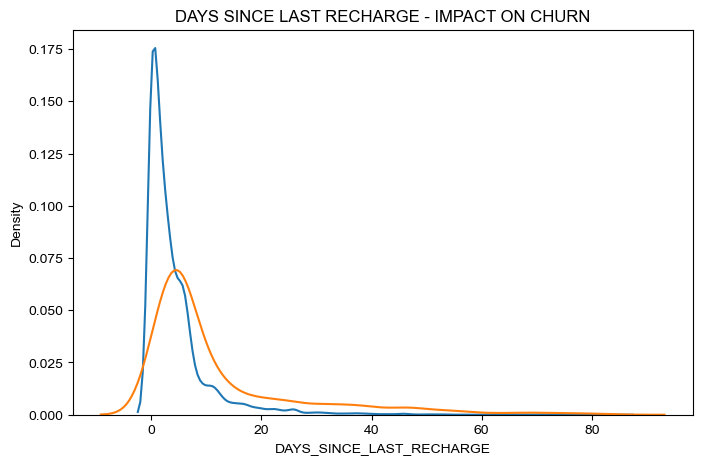

In [94]:
plt.figure(figsize = (8, 5))
sns.kdeplot(hvtelco_df.loc[hvtelco_df['churn'] == 0, 'days_since_last_rech'] , label='Churn = 0')
sns.kdeplot(hvtelco_df.loc[hvtelco_df['churn'] == 1, 'days_since_last_rech'] , label='Churn = 1')
plt.title('DAYS SINCE LAST RECHARGE - IMPACT ON CHURN');
plt.xlabel('DAYS_SINCE_LAST_RECHARGE')
sns.set(style = 'darkgrid')
plt.show()


## Create derived feature "recharge indicator" in each month 

In [95]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_6'] == '01/01/0001','rech_ind_6']=0
hvtelco_df.loc[hvtelco_df['date_of_last_rech_6'] != '01/01/0001','rech_ind_6']=1

In [96]:
hvtelco_df.rech_ind_6.value_counts()

1.0    29949
0.0       62
Name: rech_ind_6, dtype: int64

In [97]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_7'] == '01/01/0001','rech_ind_7']=0
hvtelco_df.loc[hvtelco_df['date_of_last_rech_7'] != '01/01/0001','rech_ind_7']=1

In [98]:
hvtelco_df.rech_ind_7.value_counts()

1.0    29897
0.0      114
Name: rech_ind_7, dtype: int64

In [99]:
hvtelco_df.loc[hvtelco_df['date_of_last_rech_8'] == '01/01/0001','rech_ind_8']=0
hvtelco_df.loc[hvtelco_df['date_of_last_rech_8'] != '01/01/0001','rech_ind_8']=1

In [100]:
hvtelco_df.rech_ind_8.value_counts()

1.0    29417
0.0      594
Name: rech_ind_8, dtype: int64

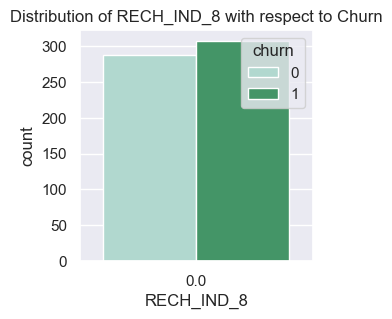

In [101]:

filtered_df = hvtelco_df[hvtelco_df['rech_ind_8'] == 0]

plt.figure(figsize=(3, 3))
sns.countplot(x='rech_ind_8', hue='churn', data=filtered_df, palette='BuGn')
plt.title('Distribution of RECH_IND_8 with respect to Churn')
plt.xlabel('RECH_IND_8')
plt.show()

In [102]:
hvtelco_df['rech_ind_good_phase']=(hvtelco_df['rech_ind_6'] + hvtelco_df['rech_ind_7'])/2

In [103]:
hvtelco_df['rech_diff_act_good_ph'] = (hvtelco_df['rech_ind_8'] - hvtelco_df['rech_ind_good_phase'])

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

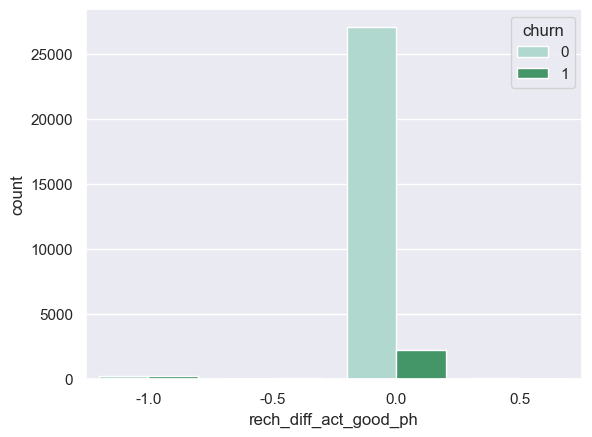

In [104]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelco_df, palette='BuGn')

In [105]:
hvtelco_df['rech_diff_act_good_ph'].value_counts()

 0.0    29317
-1.0      518
 0.5      100
-0.5       76
Name: rech_diff_act_good_ph, dtype: int64

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

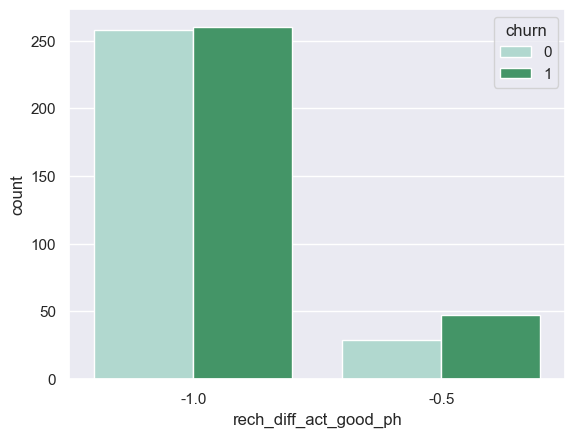

In [106]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelco_df.loc[hvtelco_df['rech_diff_act_good_ph'] < 0],palette='BuGn')

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

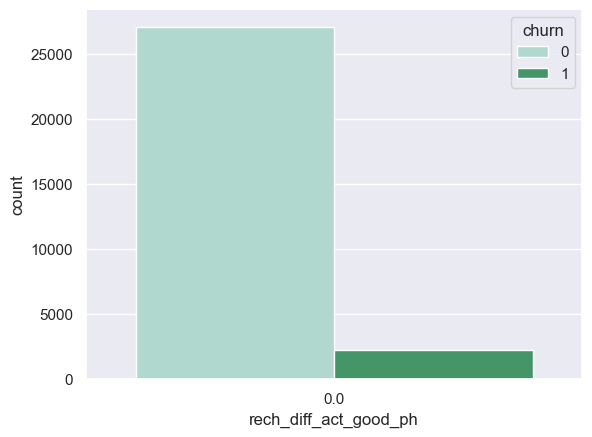

In [107]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelco_df.loc[hvtelco_df['rech_diff_act_good_ph'] == 0],palette='BuGn')

<AxesSubplot:xlabel='rech_diff_act_good_ph', ylabel='count'>

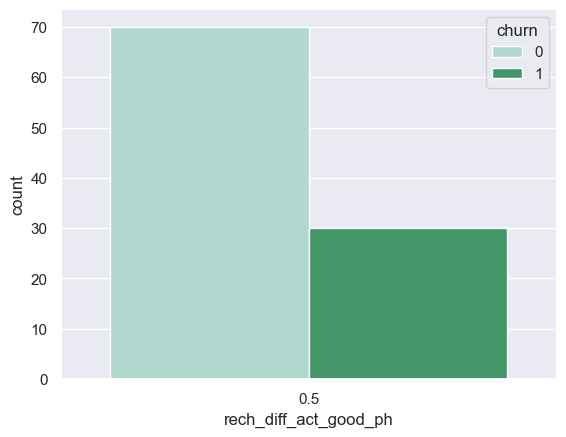

In [108]:
sns.countplot(x= 'rech_diff_act_good_ph', hue = 'churn', data = hvtelco_df.loc[hvtelco_df['rech_diff_act_good_ph'] > 0], palette='BuGn')

In [109]:
hvtelco_df['rech_amt_diff_act_good_ph'] = hvtelco_df['total_rech_amt_8'] - hvtelco_df['avg_rech_amt_goodph']

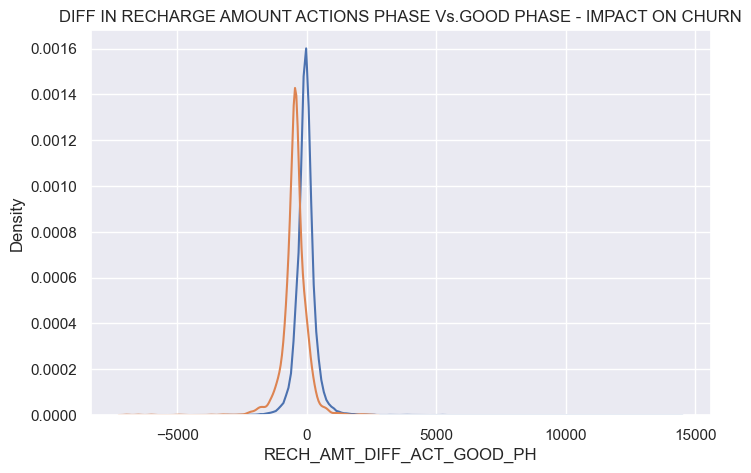

In [110]:
plt.figure(figsize = (8, 5))
sns.kdeplot(hvtelco_df.loc[hvtelco_df['churn'] == 0, 'rech_amt_diff_act_good_ph'] , label='Churn = 0')
sns.kdeplot(hvtelco_df.loc[hvtelco_df['churn'] == 1, 'rech_amt_diff_act_good_ph'] , label='Churn = 1')
plt.title('DIFF IN RECHARGE AMOUNT ACTIONS PHASE Vs.GOOD PHASE - IMPACT ON CHURN');
plt.xlabel('RECH_AMT_DIFF_ACT_GOOD_PH')
plt.show()

In [111]:
hvtelco_df.shape

(30011, 120)

In [112]:
hvtelco_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [113]:
hvtelco_df.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601            6/30/2014            7/31/2014   
8      7001524846            6/30/2014            7/31/2014   
13     7002191713            6/30/2014            7/31/2014   
16     7000875565            6/30/2014            7/31/2014   
17     7000187447            6/30/2014            7/31/2014   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7            2014-08-31  1069.180  1349.850  3171.480        57.84   
8            2014-08-31   378.721   492.223   137.362       413.69   
13           2014-08-31   492.846   205.671   593.260       501.76   
16           2014-08-31   430.975   299.869   187.894        50.51   
17           2014-08-31   690.008    18.980    25.499      1185.91   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
13       108.39       534.24        413.31        119.28        482.46   
16        74.01        70.61        296.29        229.74        162.76   
17         9.28         7.79         61.64          0.00          5.54   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11           7.98          35.26   
16           0.00           2.83           0.00           0.00          17.74   
17           0.00           4.76           4.81           0.00           8.46   

    roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7           38.06               0.0               0.0              0.00   
8            0.00               0.0               0.0              7.15   
13           1.44               0.0               0.0              0.49   
16           0.00               0.0               0.0              0.00   
17          13.34               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
7         422.16        533.91        255.79         60.86         75.14   
8         378.09        288.18         63.04        130.26        143.48   
13        205.31         53.48        353.99        701.78        138.93   
16        315.91        215.64        205.93         30.89         67.09   
17         97.54          0.00          0.00       1148.46          0.81   

    std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
7          77.84           0.0          0.18         10.01          4.50   
8          98.28           0.0          0.00          0.00          0.00   
13        655.18           0.0          0.00          1.29          0.00   
16         21.53           0.0          0.00          0.00          0.00   
17          0.00           0.0          0.00          0.00          2.58   

    spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
7           0.00          6.50         0.00          0.0          0.0   
8           0.00         10.23         0.00          0.0          0.0   
13          0.00          4.78         0.00          0.0          0.0   
16          3.26          5.91         0.00          0.0          0.0   
17          0.00          0.00         0.93          0.0          0.0   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
7           487.53          609.24          350.16        427.88   
8           508.36          431.66          171.56         81.43   
13          907.09          192.41         1015.26        215.58   
16          346.81          286.01          233.38        276.86   
17         1249.53            0.81            0.00         81.96   

    loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7 

In [114]:
hvtelco_df.drop(['spl_og_mou_6','loc_og_mou_6','std_og_mou_6','isd_og_mou_6','og_others_6','spl_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','ic_others_6'],axis=1,inplace=True)

In [115]:
hvtelco_df.drop(['spl_og_mou_7','loc_og_mou_7','std_og_mou_7','isd_og_mou_7','og_others_7','spl_ic_mou_7','loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','ic_others_7'],axis=1,inplace=True)

In [116]:
hvtelco_df.drop(['spl_og_mou_8','loc_og_mou_8','std_og_mou_8','isd_og_mou_8','og_others_8','spl_ic_mou_8','loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','ic_others_8'],axis=1,inplace=True)

In [117]:
hvtelco_df.shape

(30011, 75)

In [118]:
hvtelco_df.tail()

mobile_number last_date_of_month_6 last_date_of_month_7  \
99970     7001386760            6/30/2014            7/31/2014   
99974     7001453306            6/30/2014            7/31/2014   
99986     7001729035            6/30/2014            7/31/2014   
99988     7002111859            6/30/2014            7/31/2014   
99997     7000498689            6/30/2014            7/31/2014   

      last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
99970           2014-08-31  261.269  410.614  290.851         5.01   
99974           2014-08-31  414.303  321.093  371.016        17.56   
99986           2014-08-31  644.973  455.228  564.334       806.73   
99988           2014-08-31  312.558  512.932  402.080       199.89   
99997           2014-08-31  322.991  303.386  606.817         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
99970       142.59        97.61        329.58        500.14        355.48   
99974         0.00         1.30        428.41        366.78        360.58   
99986       549.36       775.41        784.76        617.13        595.44   
99988       174.46         2.46        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
99970           5.06            0.0            0.0          46.04   
99974           0.00            0.0            0.0           0.00   
99986           0.00            0.0            0.0           0.00   
99988           0.00            0.0            0.0           0.00   
99997           0.00            0.0            0.0           0.00   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
99970            0.0            0.0              0.00              7.00   
99974            0.0            0.0              0.00              0.93   
99986            0.0            0.0             15.96             16.71   
99988            0.0            0.0              0.00              0.00   
99997            0.0            0.0              0.00              0.00   

       loc_og_t2c_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
99970             20.85          288.54          644.58          453.21   
99974              0.13          451.24          370.28          363.93   
99986              9.15         1600.79         1183.21         1380.01   
99988              0.01          375.78          451.48          250.79   
99997              0.00            0.00            0.00            0.00   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_6  \
99970           24.93          271.83          301.41                11   
99974          117.81           99.54           53.13                 8   
99986          580.73          622.28          660.01                 6   
99988          998.96          374.98         1233.83                12   
99997            0.81           11.09            2.29                 3   

       total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
99970                19                13               337               447   
99974                 7                 3               520               410   
99986                 8                 3               567              1130   
99988                12                 9               380               554   
99997                 4                 4               381               358   

       total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
99970               337              90              67              67   
99974               388             120             120             130   
99986                25             550             786              25   
99988               504              50             154             154   
99997               716             202             179             179   

      date_of_last_r

In [119]:
hvtelco_df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech'],axis=1,inplace=True)

In [120]:
hvtelco_df.shape

(30011, 68)

In [121]:
hvtelco_df.head(10)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
24     7001125315   422.050   359.730   354.793       124.19        55.19   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   
38     7000815202   363.987   486.558   393.909       248.99       619.96   
41     7000721289   482.832   425.764   229.769        86.39       118.88   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   
24       141.11        450.33        370.48        283.36           9.30   
33         0.00          0.00          0.00          0.00           0.00   
38       666.38         88.86         50.58         97.81           0.00   
41        80.44        232.36        280.78        136.69           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   
24           0.00          13.83           9.89           0.00          22.93   
33           0.00           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  total_og_mou_6  \
7               0.00               0.0              0.00          487.53   
8               0.00               0.0              7.15          508.36   
13              0.00               0.0              0.49          907.09   
16              0.00               0.0              0.00          346.81   
17              0.00               0.0              0.00         1249.53   
21              0.00               0.0              0.00          860.34   
24              3.53               0.0              3.15          564.63   
33              0.00               0.0              0.56            0.00   
38              0.00               0.0              0.00          337.86   
41              0.00               0.0              0.00          318.76   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
7           609.24          350.16          626.46          558.04   
8           431.66          171.56          103.86           28.49   
13          192.41         1015.26          968.61          172.58   
16          286.01          233.38          364.86          381.56   
17            0.81            0.00           91.88            2.31   
21         1028.79         1068.54          207.09          131.89   
24          425.68          403.64          439.04          333.78   
33            0.00            

In [122]:
diff_col_list=['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2c_mou','total_og_mou','total_ic_mou','total_rech_num','max_rech_amt','last_day_rch_amt','vol_2g_mb','vol_3g_mb','monthly_2g','sachet_2g','monthly_3g','sachet_3g']
diff_col_list_corr=['churn']

for col in diff_col_list:
    new_col_name = col + '_diff_act_good_ph'
    hvtelco_df[new_col_name] = hvtelco_df[col+'_8'] - ((hvtelco_df[col+'_6'] + hvtelco_df[col+'_7']) / 2)
    diff_col_list_corr.append(new_col_name)
diff_col_list_corr

['churn',
 'arpu_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'roam_ic_mou_diff_act_good_ph',
 'roam_og_mou_diff_act_good_ph',
 'loc_og_t2c_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph',
 'last_day_rch_amt_diff_act_good_ph',
 'vol_2g_mb_diff_act_good_ph',
 'vol_3g_mb_diff_act_good_ph',
 'monthly_2g_diff_act_good_ph',
 'sachet_2g_diff_act_good_ph',
 'monthly_3g_diff_act_good_ph',
 'sachet_3g_diff_act_good_ph']

In [123]:
hvtelco_df['vbc_3g_diff_act_good_ph'] = hvtelco_df['aug_vbc_3g'] - ((hvtelco_df['jul_vbc_3g'] + hvtelco_df['jun_vbc_3g']) / 2)

diff_col_list_corr += ['days_since_last_rech', 'rech_amt_diff_act_good_ph', 'rech_diff_act_good_ph', 'vbc_3g_diff_act_good_ph']


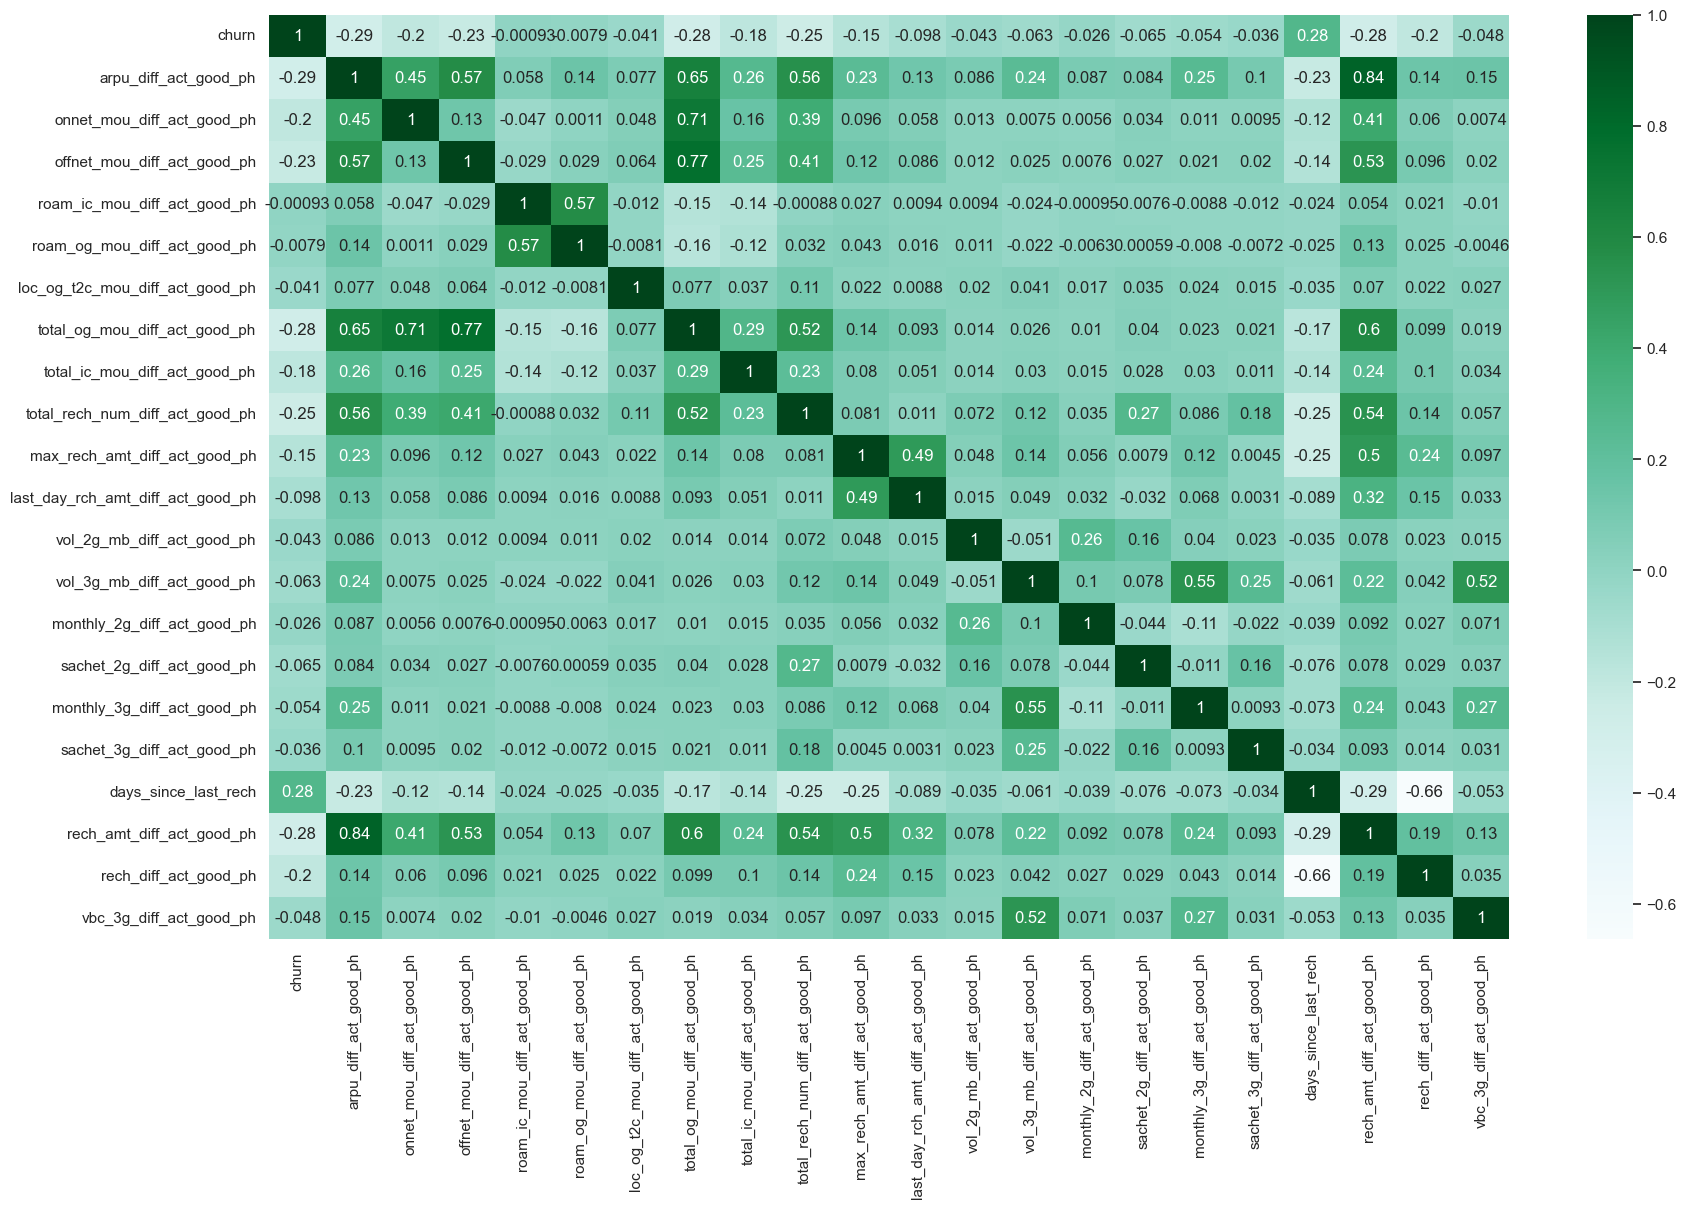

In [124]:
# Set the figure size
plt.figure(figsize=(20,12))
sns.heatmap(hvtelco_df[diff_col_list_corr].corr(),cmap='BuGn', annot=True)
plt.show()

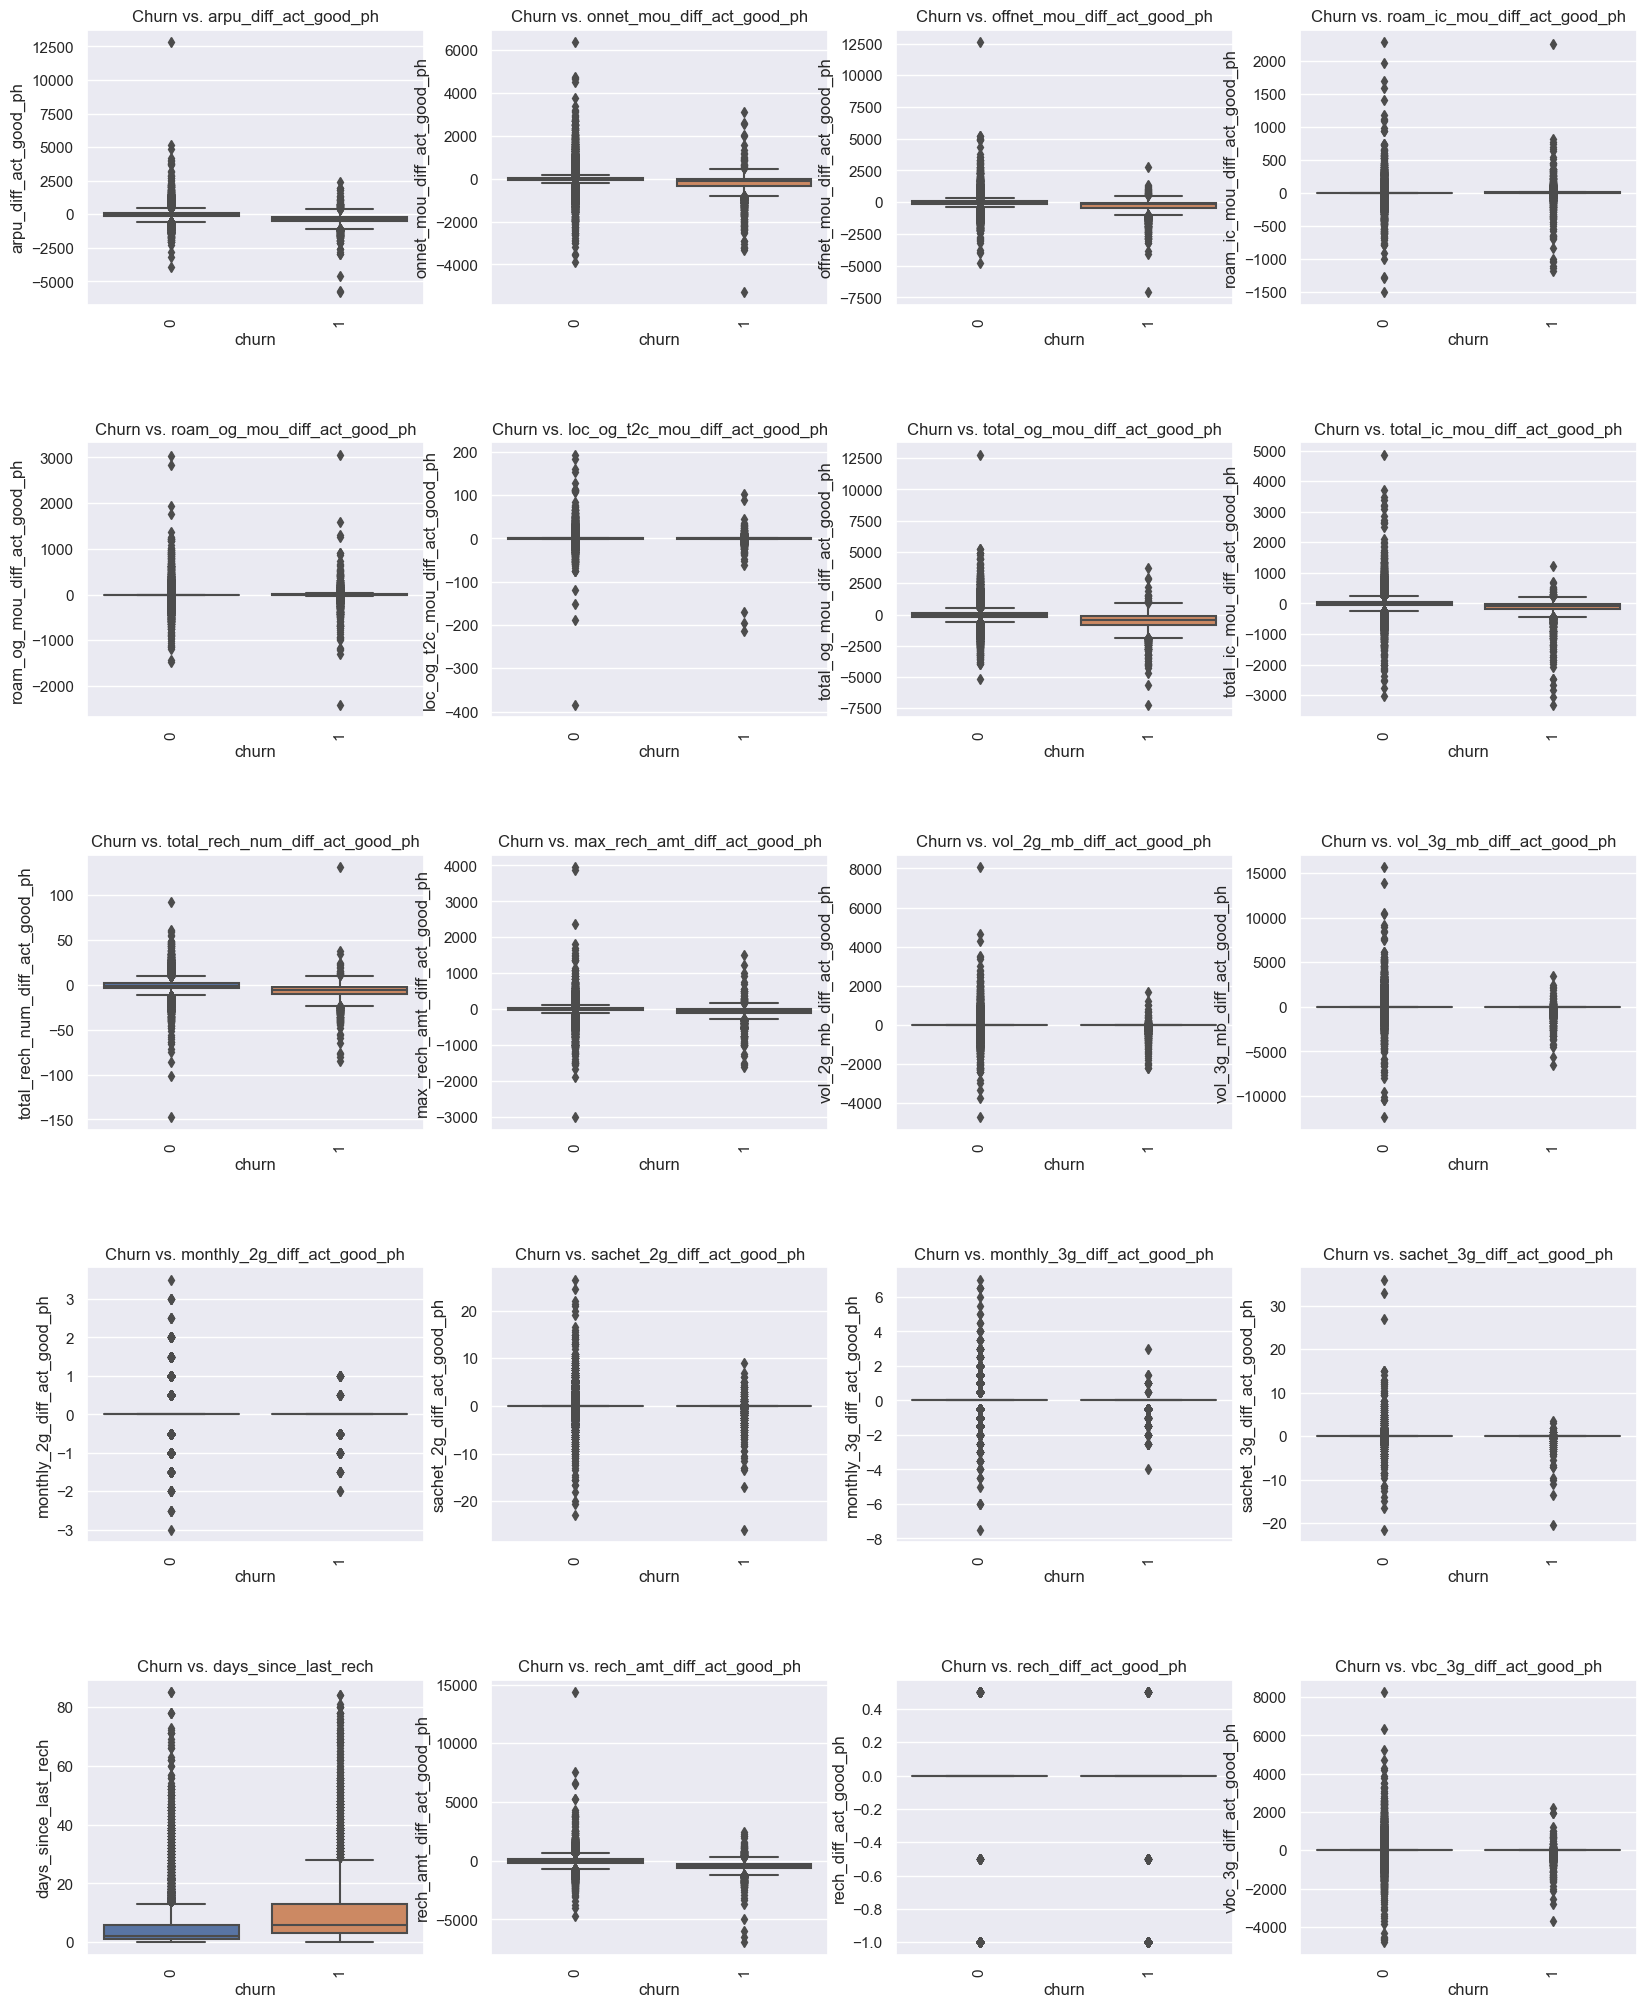

In [125]:
# Create a box plot of all the diff variables vs Churn
plt.figure(figsize=(20,25))
# 'last_day_rch_amt_diff_act_good_ph',
diff_col_list_new=[
 'arpu_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'roam_ic_mou_diff_act_good_ph',
 'roam_og_mou_diff_act_good_ph',
 'loc_og_t2c_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph',
 'vol_2g_mb_diff_act_good_ph',
 'vol_3g_mb_diff_act_good_ph',
 'monthly_2g_diff_act_good_ph',
 'sachet_2g_diff_act_good_ph',
 'monthly_3g_diff_act_good_ph',
 'sachet_3g_diff_act_good_ph',
 'days_since_last_rech',
 'rech_amt_diff_act_good_ph',
 'rech_diff_act_good_ph',
 'vbc_3g_diff_act_good_ph']
for j in range(len(diff_col_list_new)):
    var=diff_col_list_new[j]
    plt.subplot(5, 4, j+1)
    plt.title('Churn vs. '+var)
    sns.boxplot(x='churn',y=var,data=hvtelco_df)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.5)

In [126]:
hvtelco_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
13     7002191713   492.846   205.671   593.260       501.76       108.39   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
17     7000187447   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  total_og_mou_6  \
7                0.0               0.0              0.00          487.53   
8                0.0               0.0              7.15          508.36   
13               0.0               0.0              0.49          907.09   
16               0.0               0.0              0.00          346.81   
17               0.0               0.0              0.00         1249.53   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
7           609.24          350.16          626.46          558.04   
8           431.66          171.56          103.86           28.49   
13          192.41         1015.26          968.61          172.58   
16          286.01          233.38          364.86          381.56   
17            0.81            0.00           91.88            2.31   

    total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
7           428.74                 5                 5                 7   
8            16.54                19                21                14   
13         1144.53                 6                 4                11   
16          294.46                10                 6                 2   
17            0.00                19                 2                 4   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
7               1580               790              3638            1580   
8                437               601               120              90   
13               507               253               717             110   
16               570               348               160             110   
17               816                 0                30             110   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790            1580                   0                   0   
8              154              30                  50                   0   
13             110             130                 110                  50   
16             110             130                 100                 100   
17               0              30                  30                   0   

    last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
7                  779          0.0          0.0         0.00          0.0   
8                   10          0.0        356.0         0.03          0.0   
13                   0          0.0          0.0         0.02          0.0   
16                 130  

In [127]:
hvtelco_df_new=hvtelco_df.copy()
hvtelco_df_new.drop(['avg_rech_amt_goodph','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','arpu_6','arpu_7','arpu_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','rech_ind_6','rech_ind_7','rech_ind_8','rech_ind_good_phase','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],axis=1,inplace=True)

In [128]:
hvtelco_df_new.head()

mobile_number   aon  churn  days_since_last_rech  rech_diff_act_good_ph  \
7      7000701601   802      1                     5                    0.0   
8      7001524846   315      0                     1                    0.0   
13     7002191713  2607      0                     1                    0.0   
16     7000875565   511      0                    17                    0.0   
17     7000187447   667      0                     6                    0.0   

    rech_amt_diff_act_good_ph  arpu_diff_act_good_ph  \
7                      2453.0              1961.9650   
8                      -399.0              -298.1100   
13                      337.0               244.0015   
16                     -299.0              -177.5280   
17                     -378.0              -328.9950   

    onnet_mou_diff_act_good_ph  offnet_mou_diff_act_good_ph  \
7                       -3.970                     -184.385   
8                     -347.280                       48.835   
13                     229.165                      216.165   
16                       8.350                     -100.255   
17                    -589.805                      -25.280   

    roam_ic_mou_diff_act_good_ph  roam_og_mou_diff_act_good_ph  \
7                          6.780                        19.895   
8                          0.000                         0.000   
13                       -11.775                       -20.180   
16                        -1.415                        -8.870   
17                         2.430                         9.110   

    loc_og_t2c_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
7                              0.00                       -198.225   
8                              7.15                       -298.450   
13                             0.49                        465.510   
16                             0.00                        -83.030   
17                             0.00                       -625.170   

    total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
7                        -163.510                              2.0   
8                         -49.635                             -6.0   
13                        573.935                              6.0   
16                        -78.750                             -6.0   
17                        -47.095                             -6.5   

    max_rech_amt_diff_act_good_ph  last_day_rch_amt_diff_act_good_ph  \
7                           395.0                              779.0   
8                           -92.0                              -15.0   
13                           20.0                              -80.0   
16                           20.0                               30.0   
17                          -25.0                              -15.0   

    vol_2g_mb_diff_act_good_ph  vol_3g_mb_diff_act_good_ph  \
7                         0.00                       0.000   
8                      -177.97                    -363.535   
13                        0.02                       0.000   
16                        0.00                       0.000   
17                        0.00                       0.000   

    monthly_2g_diff_act_good_ph  sachet_2g_diff_act_good_ph  \
7                           0.0                         0.0   
8                          -0.5                         2.5   
13                          0.0                         3.0   
16                          0.0                         0.0   
17                          0.0                         0.0   

    monthly_3g_diff_act_good_ph  sachet_3g_diff_act_good_ph  \
7                           0.0                         0.0   
8                           0.0                         0.0   
13                          0.0                         0.0   
16                          0.0                         0.0   
17                          0.0                         0.0   

    vbc_3g

In [129]:
hvtelco_df_new.drop('mobile_number',axis=1).corr()

aon     churn  days_since_last_rech  \
aon                                1.000000 -0.124502              0.055066   
churn                             -0.124502  1.000000              0.284226   
days_since_last_rech               0.055066  0.284226              1.000000   
rech_diff_act_good_ph             -0.008031 -0.196306             -0.662457   
rech_amt_diff_act_good_ph          0.047635 -0.275997             -0.293087   
arpu_diff_act_good_ph              0.062597 -0.286855             -0.226442   
onnet_mou_diff_act_good_ph         0.040802 -0.198604             -0.123883   
offnet_mou_diff_act_good_ph        0.043287 -0.226406             -0.141612   
roam_ic_mou_diff_act_good_ph      -0.006852 -0.000927             -0.023544   
roam_og_mou_diff_act_good_ph      -0.008007 -0.007931             -0.025131   
loc_og_t2c_mou_diff_act_good_ph    0.009324 -0.040874             -0.035238   
total_og_mou_diff_act_good_ph      0.056342 -0.278545             -0.170618   
total_ic_mou_diff_act_good_ph      0.019678 -0.183089             -0.139341   
total_rech_num_diff_act_good_ph    0.050793 -0.250313             -0.251236   
max_rech_amt_diff_act_good_ph      0.001878 -0.149452             -0.251476   
last_day_rch_amt_diff_act_good_ph  0.025086 -0.097965             -0.088659   
vol_2g_mb_diff_act_good_ph         0.006692 -0.042741             -0.034686   
vol_3g_mb_diff_act_good_ph         0.011907 -0.063126             -0.061024   
monthly_2g_diff_act_good_ph        0.005603 -0.025585             -0.038525   
sachet_2g_diff_act_good_ph         0.021152 -0.065067             -0.076365   
monthly_3g_diff_act_good_ph        0.021873 -0.054349             -0.073014   
sachet_3g_diff_act_good_ph         0.002876 -0.036492             -0.034086   
vbc_3g_diff_act_good_ph            0.005321 -0.048072             -0.053004   

                                   rech_diff_act_good_ph  \
aon                                            -0.008031   
churn                                          -0.196306   
days_since_last_rech                           -0.662457   
rech_diff_act_good_ph                           1.000000   
rech_amt_diff_act_good_ph                       0.193429   
arpu_diff_act_good_ph                           0.142483   
onnet_mou_diff_act_good_ph                      0.059858   
offnet_mou_diff_act_good_ph                     0.096252   
roam_ic_mou_diff_act_good_ph                    0.021121   
roam_og_mou_diff_act_good_ph                    0.025120   
loc_og_t2c_mou_diff_act_good_ph                 0.022444   
total_og_mou_diff_act_good_ph                   0.099495   
total_ic_mou_diff_act_good_ph                   0.101789   
total_rech_num_diff_act_good_ph                 0.143725   
max_rech_amt_diff_act_good_ph                   0.244869   
last_day_rch_amt_diff_act_good_ph               0.153466   
vol_2g_mb_diff_act_good_ph                      0.022702   
vol_3g_mb_diff_act_good_ph                      0.042172   
monthly_2g_diff_act_good_ph                     0.026547   
sachet_2g_diff_act_good_ph                      0.029471   
monthly_3g_diff_act_good_ph                     0.043282   
sachet_3g_diff_act_good_ph                      0.013512   
vbc_3g_diff_act_good_ph                         0.034983   

                                   rech_amt_diff_act_good_ph  \
aon                                                 0.047635   
churn                                              -0.275997   
days_since_last_rech                               -0.293087   
rech_diff_act_good_ph                               0.193429   
rech_amt_diff_act_good_ph                           1.000000   
arpu_diff_act_good_ph                               0.840977   
onnet_mou_diff_act_good_ph                          0.410860   
offnet_mou_diff_act_good_ph                         0.529841   
roam_ic_mou_diff_act_good_ph                        0.053655   
roam_og_mou_diff_act_good_ph                        0.130170  

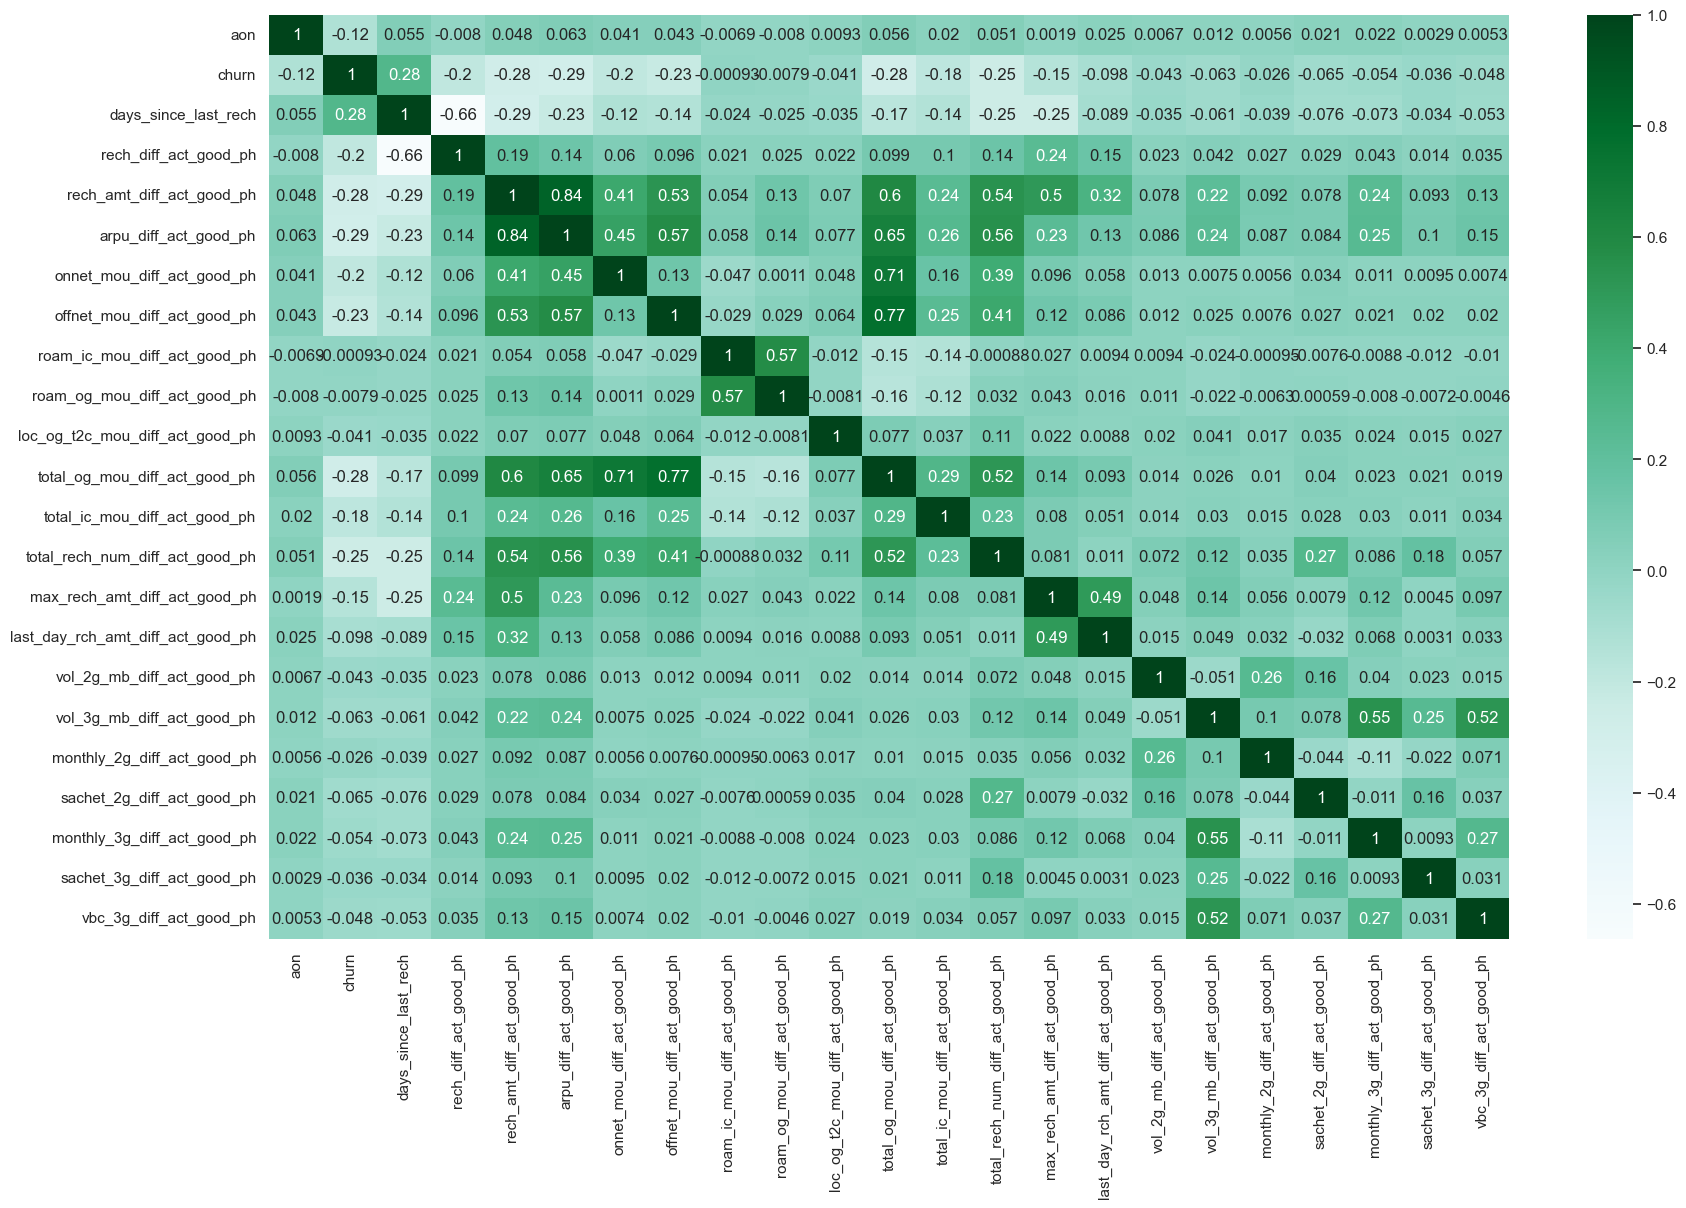

In [130]:
# Set the figure size
plt.figure(figsize=(20,12))
sns.heatmap(hvtelco_df_new.drop('mobile_number',axis=1).corr(),cmap='BuGn', annot=True)
plt.show()

In [131]:
cor=hvtelco_df_new.drop('mobile_number',axis=1).corr()
cor.loc[abs(cor['churn']) < 0.1]['churn']

roam_ic_mou_diff_act_good_ph        -0.000927
roam_og_mou_diff_act_good_ph        -0.007931
loc_og_t2c_mou_diff_act_good_ph     -0.040874
last_day_rch_amt_diff_act_good_ph   -0.097965
vol_2g_mb_diff_act_good_ph          -0.042741
vol_3g_mb_diff_act_good_ph          -0.063126
monthly_2g_diff_act_good_ph         -0.025585
sachet_2g_diff_act_good_ph          -0.065067
monthly_3g_diff_act_good_ph         -0.054349
sachet_3g_diff_act_good_ph          -0.036492
vbc_3g_diff_act_good_ph             -0.048072
Name: churn, dtype: float64

In [132]:
hvtelco_df_new.drop(['roam_ic_mou_diff_act_good_ph','roam_og_mou_diff_act_good_ph','loc_og_t2c_mou_diff_act_good_ph','last_day_rch_amt_diff_act_good_ph','vol_2g_mb_diff_act_good_ph','vol_3g_mb_diff_act_good_ph','monthly_2g_diff_act_good_ph','sachet_2g_diff_act_good_ph','monthly_3g_diff_act_good_ph','sachet_3g_diff_act_good_ph','vbc_3g_diff_act_good_ph'],axis=1,inplace=True)

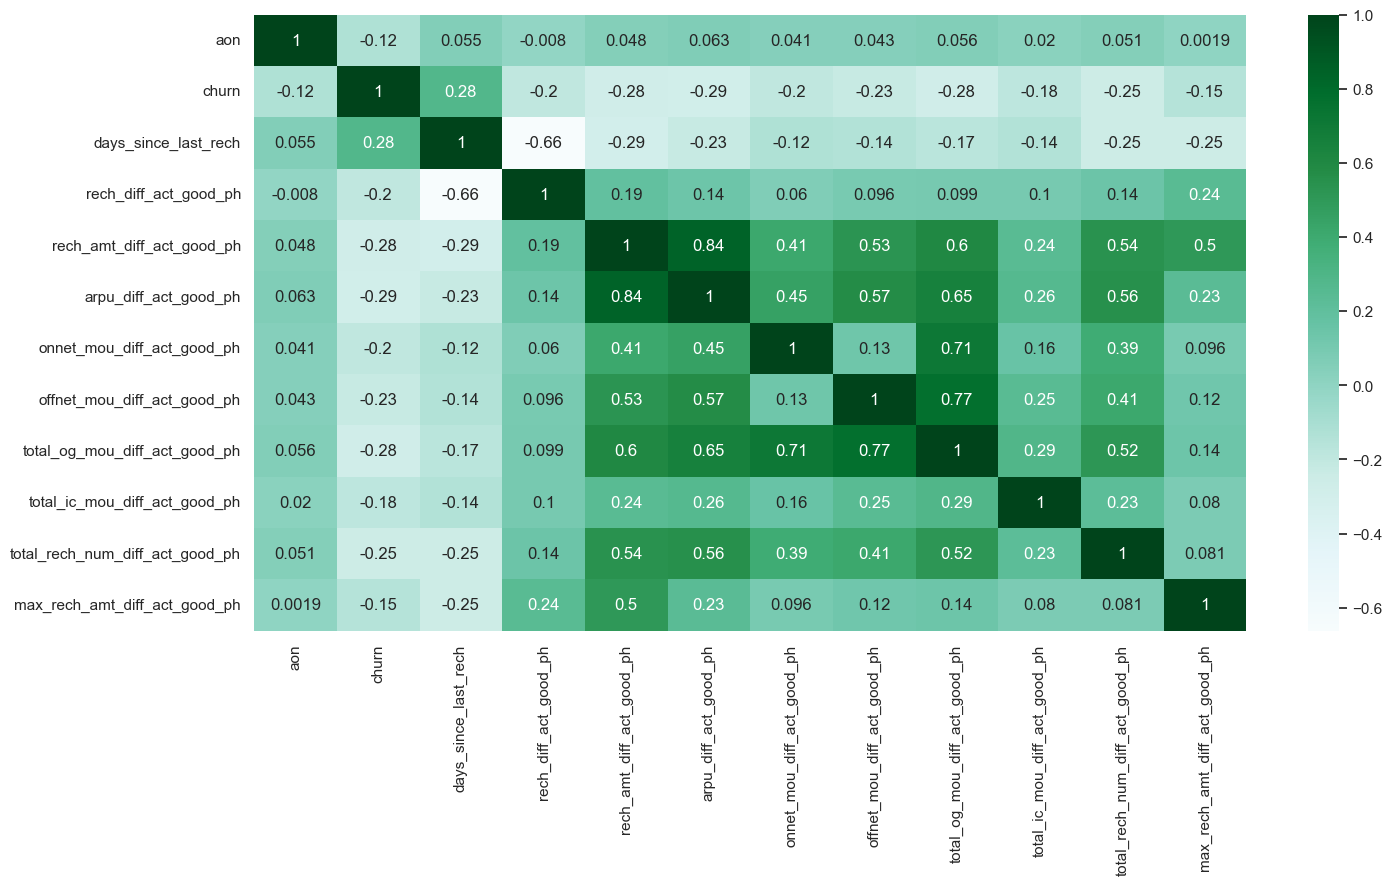

In [133]:
# Set the figure size
plt.figure(figsize=(16,8))
sns.heatmap(hvtelco_df_new.drop('mobile_number',axis=1).corr(),cmap='BuGn', annot=True)
plt.show()

In [134]:
# Drop the Avg Revenue column as we are doing Usage based Churn prediction
hvtelco_df_new.drop(['arpu_diff_act_good_ph'],axis=1,inplace=True)

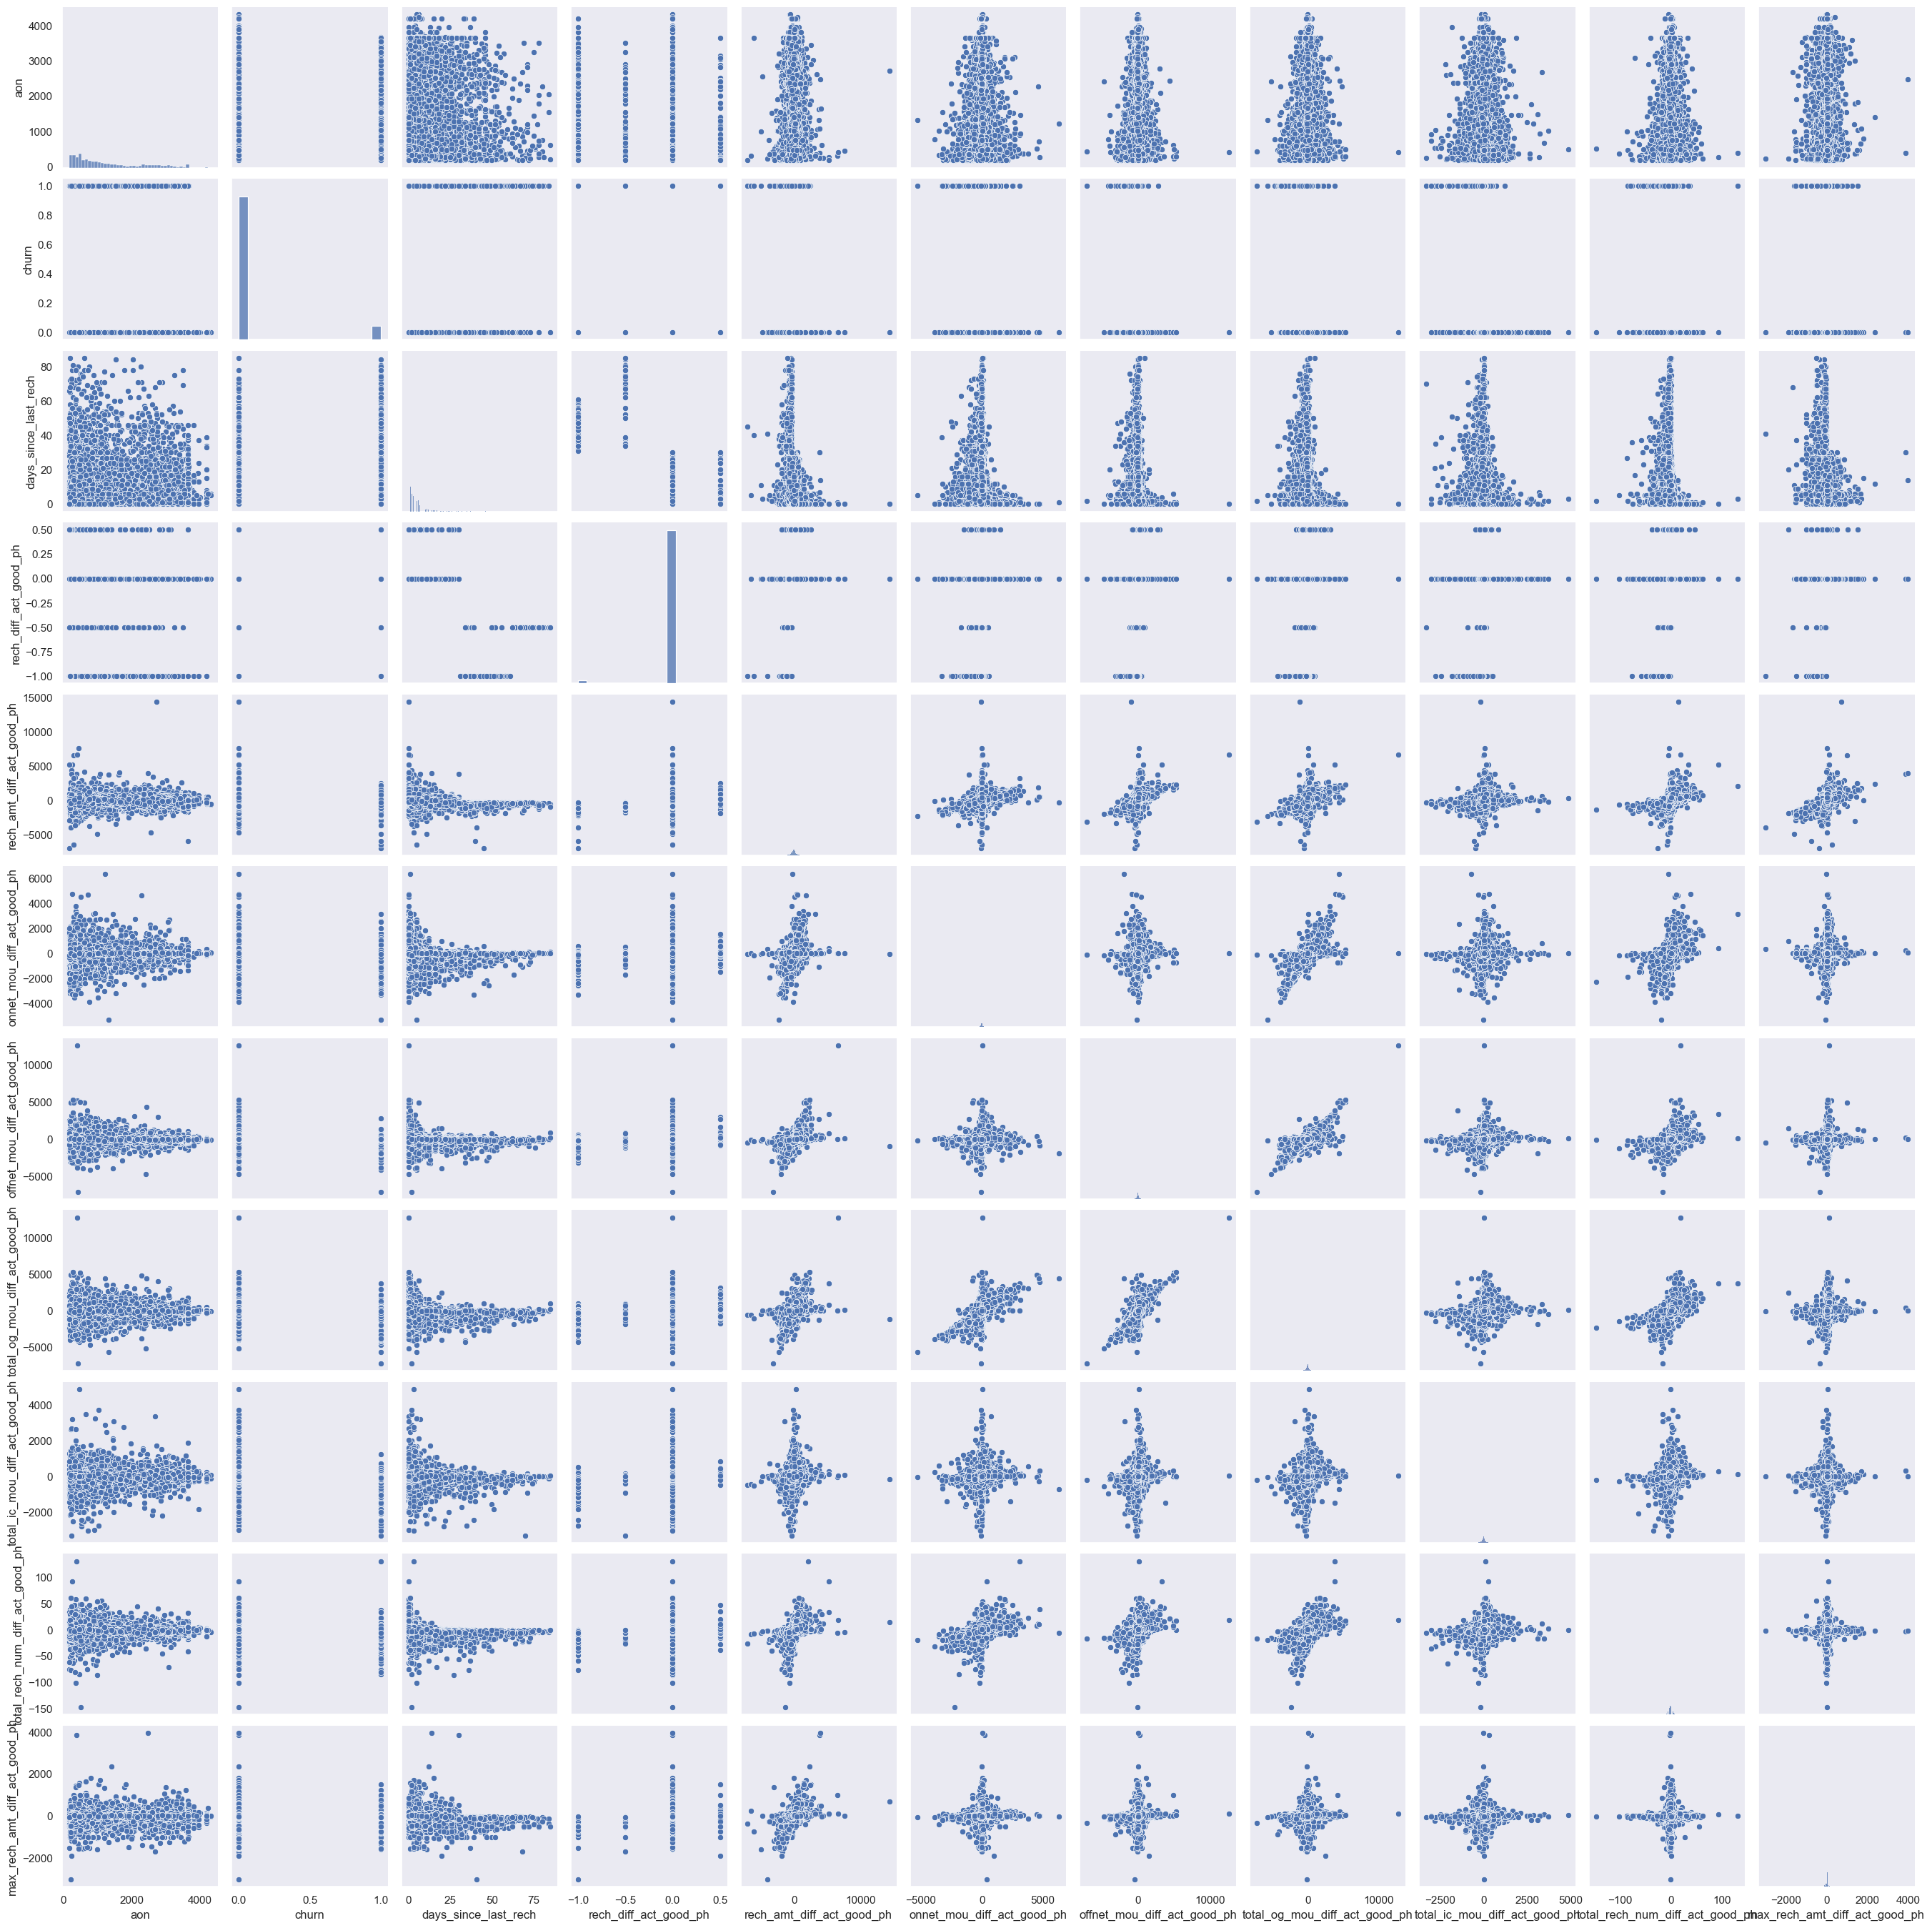

In [135]:
# Visualising pair-wise relationship between the numeric variables
sns.set_style("dark")
sns.pairplot(hvtelco_df_new.drop('mobile_number',axis=1))
plt.show()

In [136]:
hvtelco_df_new.head()

mobile_number   aon  churn  days_since_last_rech  rech_diff_act_good_ph  \
7      7000701601   802      1                     5                    0.0   
8      7001524846   315      0                     1                    0.0   
13     7002191713  2607      0                     1                    0.0   
16     7000875565   511      0                    17                    0.0   
17     7000187447   667      0                     6                    0.0   

    rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
7                      2453.0                      -3.970   
8                      -399.0                    -347.280   
13                      337.0                     229.165   
16                     -299.0                       8.350   
17                     -378.0                    -589.805   

    offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
7                      -184.385                       -198.225   
8                        48.835                       -298.450   
13                      216.165                        465.510   
16                     -100.255                        -83.030   
17                      -25.280                       -625.170   

    total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
7                        -163.510                              2.0   
8                         -49.635                             -6.0   
13                        573.935                              6.0   
16                        -78.750                             -6.0   
17                        -47.095                             -6.5   

    max_rech_amt_diff_act_good_ph  
7                           395.0  
8                           -92.0  
13                           20.0  
16                           20.0  
17                          -25.0

In [137]:
num_vars = list(hvtelco_df_new.drop(['mobile_number','churn'],axis=1).columns)
num_vars

['aon',
 'days_since_last_rech',
 'rech_diff_act_good_ph',
 'rech_amt_diff_act_good_ph',
 'onnet_mou_diff_act_good_ph',
 'offnet_mou_diff_act_good_ph',
 'total_og_mou_diff_act_good_ph',
 'total_ic_mou_diff_act_good_ph',
 'total_rech_num_diff_act_good_ph',
 'max_rech_amt_diff_act_good_ph']

In [138]:
hvtelco_df_new['churn']=hvtelco_df_new['churn'].astype('int')

Text(0.5, 1.0, 'Churn Data Imbalance')

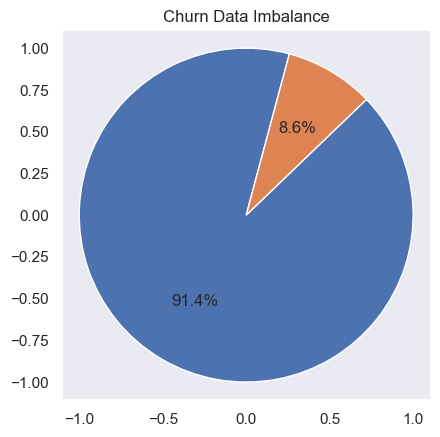

In [139]:
pie_sizes_m = hvtelco_df_new['churn'].value_counts()/len(hvtelco_df_new.index) * 100
plt.pie(pie_sizes_m, autopct='%1.1f%%',shadow=False, startangle=75, frame = True)
plt.title('Churn Data Imbalance')

In [140]:
# Drop the Lead Number, Converted fields to form the X features
X=hvtelco_df_new.drop(['mobile_number','churn'], axis =1)
X.head()

aon  days_since_last_rech  rech_diff_act_good_ph  \
7    802                     5                    0.0   
8    315                     1                    0.0   
13  2607                     1                    0.0   
16   511                    17                    0.0   
17   667                     6                    0.0   

    rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
7                      2453.0                      -3.970   
8                      -399.0                    -347.280   
13                      337.0                     229.165   
16                     -299.0                       8.350   
17                     -378.0                    -589.805   

    offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
7                      -184.385                       -198.225   
8                        48.835                       -298.450   
13                      216.165                        465.510   
16                     -100.255                        -83.030   
17                      -25.280                       -625.170   

    total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
7                        -163.510                              2.0   
8                         -49.635                             -6.0   
13                        573.935                              6.0   
16                        -78.750                             -6.0   
17                        -47.095                             -6.5   

    max_rech_amt_diff_act_good_ph  
7                           395.0  
8                           -92.0  
13                           20.0  
16                           20.0  
17                          -25.0

In [141]:
# Create the Y variable
y = hvtelco_df_new['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

## Over sample the data using SMOTE to balance the Data

In [142]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Applying SMOTE oversampling on the training data
oversampler = SMOTE(random_state=0)
os_X_train, os_y_train = oversampler.fit_resample(X_train, y_train)

In [143]:
X_train=pd.DataFrame(os_X_train)
X_train.columns=num_vars

X_train.head()

aon  days_since_last_rech  rech_diff_act_good_ph  \
0   353                     0                    0.0   
1  1076                    11                    0.0   
2  2282                     1                    0.0   
3  2613                     1                    0.0   
4   439                     0                    0.0   

   rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
0                      -11.5                     -26.445   
1                       -6.0                      62.220   
2                       31.5                      29.965   
3                       22.0                    -189.925   
4                     -380.0                    -114.920   

   offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
0                       -24.87                        -49.960   
1                        -0.36                         61.865   
2                        38.63                         63.080   
3                       190.32                          0.400   
4                      -206.69                       -321.570   

   total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
0                         37.515                              3.5   
1                          8.215                             -3.0   
2                       -138.400                              1.0   
3                        -38.105                              0.0   
4                         -7.800                            -15.5   

   max_rech_amt_diff_act_good_ph  
0                            0.0  
1                           44.0  
2                          -25.0  
3                            0.0  
4                            0.0

In [144]:
y_train=os_y_train.tolist()

In [145]:
# Instantiate an object of MinMaxScaler
standard_scaler = StandardScaler()

# Fit and transform the numerical variables
# Both can be done in single step using fit_transform()
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

aon  days_since_last_rech  rech_diff_act_good_ph  \
0 -0.816820             -0.733840               0.273836   
1 -0.015809              0.276349               0.273836   
2  1.320318             -0.642005               0.273836   
3  1.687032             -0.642005               0.273836   
4 -0.721541             -0.733840               0.273836   

   rech_amt_diff_act_good_ph  onnet_mou_diff_act_good_ph  \
0                   0.505362                    0.251866   
1                   0.516983                    0.483434   
2                   0.596211                    0.399193   
3                   0.576140                   -0.175099   
4                  -0.273191                    0.020794   

   offnet_mou_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
0                     0.315111                       0.371591   
1                     0.370301                       0.549456   
2                     0.458097                       0.551389   
3                     0.799665                       0.451692   
4                    -0.094303                      -0.060423   

   total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
0                       0.455162                         0.990076   
1                       0.333213                         0.174274   
2                      -0.277008                         0.676306   
3                       0.140426                         0.550798   
4                       0.266558                        -1.394575   

   max_rech_amt_diff_act_good_ph  
0                       0.272277  
1                       0.569568  
2                       0.103361  
3                       0.272277  
4                       0.272277

In [146]:
# Instantiate a PCA object
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(X_train[num_vars])

PCA(random_state=42, svd_solver='randomized')

In [147]:
#List of PCA components.
pca.components_

array([[ 1.03826759e-01, -2.61673623e-01,  2.34907813e-01,
         4.40063493e-01,  3.07562203e-01,  3.57222770e-01,
         4.36735474e-01,  2.50836281e-01,  3.76623085e-01,
         2.32819850e-01],
       [ 1.79055871e-01,  5.77371285e-01, -5.91145285e-01,
         3.68176660e-02,  2.29189515e-01,  2.20606712e-01,
         3.05587702e-01, -7.26319269e-02,  1.33888863e-01,
        -2.56890022e-01],
       [ 5.42791484e-01,  1.32733924e-01, -1.34079190e-01,
         2.54150448e-01, -1.56505205e-01, -3.99041174e-02,
        -1.38319178e-01, -2.80008297e-01, -1.73556296e-01,
         6.71896260e-01],
       [-7.91055161e-01,  1.75512548e-01, -2.20680908e-01,
         2.23268629e-01, -1.12143736e-01,  1.73791972e-01,
         4.91975618e-02, -2.84674922e-02, -1.53410608e-01,
         4.18727422e-01],
       [-1.51234199e-01, -4.81227568e-02,  3.23274474e-02,
         2.70042851e-02,  7.21090811e-01, -5.18597228e-01,
         6.85090679e-02, -4.10146003e-01, -1.17669485e-02,
         1.

In [148]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.38039125, 0.16631432, 0.09677586, 0.09471037, 0.08851356,
       0.07730579, 0.05184708, 0.02294294, 0.01996157, 0.00123727])

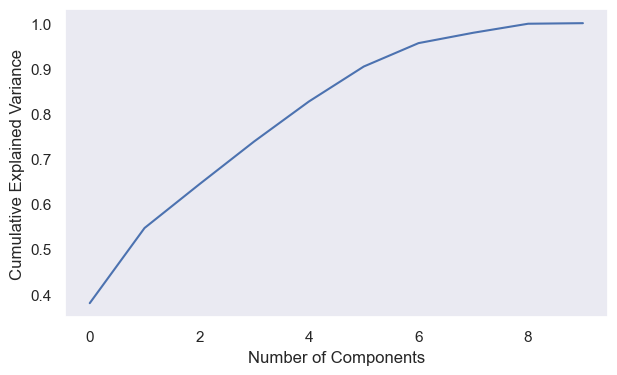

In [149]:
# Plotting the scree plot to visualize cumulative explained variance for PCA components
fig = plt.figure(figsize=(7, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
sns.set(style='dark')

In [150]:
# Creating a DataFrame to display cumulative variance values for each principal component
variance_df = pd.DataFrame({
    'Component': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
    'Cumulative_Variance': list(np.cumsum(pca.explained_variance_ratio_) * 100)
})
variance_df

Component  Cumulative_Variance
0       PC1            38.039125
1       PC2            54.670557
2       PC3            64.348143
3       PC4            73.819180
4       PC5            82.670536
5       PC6            90.401114
6       PC7            95.585822
7       PC8            97.880116
8       PC9            99.876273
9      PC10           100.000000

In [151]:
#Understanding how the original 9 variables are loaded on the principal components.
colnames = list(X_train[num_vars].columns)
X_train_pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7]})
X_train_pcs_df

Feature       PC1       PC2       PC3       PC4  \
0                              aon  0.103827  0.179056  0.542791 -0.791055   
1             days_since_last_rech -0.261674  0.577371  0.132734  0.175513   
2            rech_diff_act_good_ph  0.234908 -0.591145 -0.134079 -0.220681   
3        rech_amt_diff_act_good_ph  0.440063  0.036818  0.254150  0.223269   
4       onnet_mou_diff_act_good_ph  0.307562  0.229190 -0.156505 -0.112144   
5      offnet_mou_diff_act_good_ph  0.357223  0.220607 -0.039904  0.173792   
6    total_og_mou_diff_act_good_ph  0.436735  0.305588 -0.138319  0.049198   
7    total_ic_mou_diff_act_good_ph  0.250836 -0.072632 -0.280008 -0.028467   
8  total_rech_num_diff_act_good_ph  0.376623  0.133889 -0.173556 -0.153411   
9    max_rech_amt_diff_act_good_ph  0.232820 -0.256890  0.671896  0.418727   

        PC5       PC6       PC7       PC8  
0 -0.151234 -0.054783  0.098723  0.033708  
1 -0.048123 -0.158488 -0.021447 -0.660626  
2  0.032327  0.182640  0.165337 -0.615510  
3  0.027004 -0.013964 -0.182655  0.306572  
4  0.721091 -0.194529  0.218210 -0.015604  
5 -0.518597  0.398819  0.263481 -0.030490  
6  0.068509  0.150075  0.349008 -0.052732  
7 -0.410146 -0.821221  0.097647 -0.008509  
8 -0.011767  0.081239 -0.825021 -0.205294  
9  0.105221 -0.194690 -0.007524 -0.208391

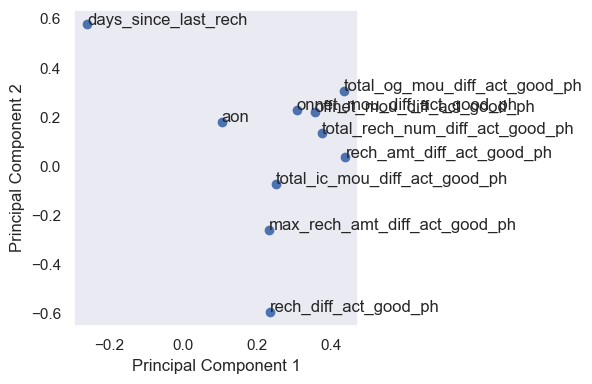

In [152]:
# Let's do a scatter plot using the top two PCs to visualise how these features are loaded
fig = plt.figure(figsize = (6,4))
plt.scatter(X_train_pcs_df.PC1, X_train_pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train_pcs_df.Feature):
    plt.annotate(txt, (X_train_pcs_df.PC1[i],X_train_pcs_df.PC2[i]))
plt.tight_layout()

In [153]:
# Perform dimensionality reduction using five principal components
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=8)

In [154]:
# Create PCA data from the scaled numerical variables of the country dataframe
pca_df = pca_final.fit_transform(X_train[num_vars])
pca_df.shape

(38368, 8)

In [155]:
# Creating a transpose 
pca_dft = np.transpose(pca_df)

In [156]:
# Create a dataframe from the Principal Component values and assign column names
X_train_pca = pd.DataFrame({'PC1':pca_dft[0],'PC2':pca_dft[1],'PC3':pca_dft[2],'PC4':pca_dft[3],'PC5':pca_dft[4],'PC6':pca_dft[5],'PC7':pca_dft[6],'PC8':pca_dft[7]})

In [157]:
# Check the data count
X_train_pca.shape

(38368, 8)

In [158]:
# Check the data count
X_train_pca.describe()

PC1           PC2           PC3           PC4           PC5  \
count  3.836800e+04  3.836800e+04  3.836800e+04  3.836800e+04  3.836800e+04   
mean  -4.453215e-16  4.094468e-18  1.897410e-16 -1.058022e-16 -1.755847e-17   
std    1.950387e+00  1.289641e+00  9.837530e-01  9.732018e-01  9.408253e-01   
min   -1.415961e+01 -1.268227e+01 -1.533959e+01 -1.396533e+01 -1.273509e+01   
25%   -1.095020e+00 -2.632860e-01 -4.619243e-01 -6.335722e-01 -3.769605e-01   
50%    3.035318e-01  1.909726e-01 -9.618973e-02 -2.155576e-01  1.406970e-02   
75%    1.246379e+00  5.981022e-01  4.724494e-01  4.840138e-01  3.841171e-01   
max    2.747053e+01  7.282127e+00  1.887599e+01  8.261336e+00  1.597887e+01   

                PC6           PC7           PC8  
count  3.836800e+04  3.836800e+04  3.836800e+04  
mean  -6.770223e-17  6.059090e-17  2.659684e-16  
std    8.792480e-01  7.200301e-01  4.660782e-01  
min   -1.422117e+01 -1.289438e+01 -1.001122e+01  
25%   -3.166151e-01 -3.372199e-01 -1.902339e-01  
50%   -4.606547e-03  1.304310e-02  1.117000e-02  
75%    3.282652e-01  3.702738e-01  2.027465e-01  
max    1.289565e+01  1.060712e+01  1.985395e+01

## Test data Principal components 

In [159]:
# Transform and create PCA data from the scaled numerical variables of the X_test dataframe
y_test = y_test.tolist()
X_test[num_vars] = scaler.transform(X_test[num_vars])
pcs_df_test = pca_final.transform(X_test[num_vars])
pca_df_test_t = np.transpose(pcs_df_test)

# Create a dataframe from the Principal Component values and assign column names
X_test_pca = pd.DataFrame({
    'PC1': pca_df_test_t[0],
    'PC2': pca_df_test_t[1],
    'PC3': pca_df_test_t[2],
    'PC4': pca_df_test_t[3],
    'PC5': pca_df_test_t[4],
    'PC6': pca_df_test_t[5],
    'PC7': pca_df_test_t[6],
    'PC8': pca_df_test_t[7]
})

## Tree models, Random Forest & Boosting models using PCA data

In [160]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

## Decision Tree CLassifier 

In [161]:
# Create the parameter grid for decision tree classifier
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model with decision tree classifier
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                              cv=n_folds, verbose=1)

# Fit the grid search to the PCA-transformed data
grid_search_dt.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50)},
             verbose=1)

In [162]:
# results for decision tree classifier
dt_cv_results = pd.DataFrame(grid_search_dt.cv_results_)
dt_cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.332421      0.070690         0.003857        0.006065   
1       0.319782      0.098327         0.004498        0.006175   
2       0.251745      0.025756         0.001477        0.001814   
3       0.238021      0.017480         0.005593        0.005762   
4       0.230140      0.019742         0.000000        0.000000   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                     50   
3         entropy               5                    100   
4         entropy               5                    100   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                     150  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.795283           0.800104           0.801668           0.801121   
1           0.795283           0.800104           0.801668           0.801121   
2           0.795283           0.800104           0.801668           0.801121   
3           0.795674           0.798541           0.802580           0.800730   
4           0.795674           0.798541           0.802580           0.800730   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.797341         0.799103        0.002423               40  
1           0.797341         0.799103        0.002423               40  
2           0.797341         0.799103        0.002423               40  
3           0.798254         0.799156        0.002346               37  
4           0.798254         0.799156        0.002346               37

In [163]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)

best accuracy 0.814220281909417
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=100)


In [164]:
# Create a decision tree model with optimal hyperparameters
dt_optimal = DecisionTreeClassifier(criterion="entropy", 
                                    random_state=None,
                                    max_depth=15, 
                                    min_samples_leaf=50,
                                    min_samples_split=50, 
                                    splitter='best')

# Fit the decision tree model to the PCA-transformed training data
dt_optimal.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=50)

In [165]:
# accuracy score
dt_optimal.score(X_test_pca,y_test)*100

79.72012438916038

In [166]:
# Making predictions using the optimal decision tree model on the PCA-transformed test and train data
y_pred_dt_optimal = dt_optimal.predict(X_test_pca)
y_train_pred_dt_optimal = dt_optimal.predict(X_train_pca)

# Print confusion matrix, accuracy, and recall score for the predictions on the test data
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_dt_optimal))
print("Accuracy Score (Test Data):", accuracy_score(y_test, y_pred_dt_optimal))
print("Recall Score (Test Data):", recall_score(y_test, y_pred_dt_optimal))

# Print confusion matrix, accuracy, and recall score for the predictions on the train data
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train, y_train_pred_dt_optimal))
print("Accuracy Score (Train Data):", accuracy_score(y_train, y_train_pred_dt_optimal))
print("Recall Score (Train Data):", recall_score(y_train, y_train_pred_dt_optimal))

Confusion Matrix (Test Data):
 [[6657 1577]
 [ 249  521]]
Accuracy Score (Test Data): 0.7972012438916037
Recall Score (Test Data): 0.6766233766233766
Confusion Matrix (Train Data):
 [[16167  3017]
 [ 3055 16129]]
Accuracy Score (Train Data): 0.841743119266055
Recall Score (Train Data): 0.8407527105921602


##  Random Forest Model 

In [167]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100, 200, 300],
    'max_features': [8]
}

# Create a base model for random forest
rf = RandomForestClassifier()

# Instantiate the grid search model with random forest classifier
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=1)

In [168]:
# Fit the grid search to the data
grid_search_rf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [8],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [169]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get accuracy of 0.8084341868998909 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [170]:
# model with the best hyperparameters

rfc_optimal = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=100)

In [171]:
# fit
rfc_optimal.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=100,
                       min_samples_split=200)

In [172]:
# predict
rfc_test_predictions = rfc_optimal.predict(X_test_pca)

In [173]:
print(confusion_matrix(y_test,rfc_test_predictions))
print(accuracy_score(y_test,rfc_test_predictions))
print(precision_score(y_test,rfc_test_predictions))
print(recall_score(y_test,rfc_test_predictions))

[[6888 1346]
 [ 210  560]]
0.8271879164815638
0.2938090241343127
0.7272727272727273


In [174]:
# predict
rfc_train_predictions = rfc_optimal.predict(X_train_pca)

In [175]:
print(confusion_matrix(y_train,rfc_train_predictions))
print(accuracy_score(y_train,rfc_train_predictions))
print(precision_score(y_train,rfc_train_predictions))
print(recall_score(y_train,rfc_train_predictions))

[[16153  3031]
 [ 3753 15431]]
0.823185988323603
0.8358249377098906
0.8043682235195997


## Adaboost Classifier

In [176]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [177]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [178]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=-1)

In [179]:
grid_search_ABC.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [180]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      38.711577      0.574957         0.608199        0.044699   
1      78.610100      0.598144         1.119617        0.079752   
2     121.442548      3.092483         1.772016        0.281960   
3      95.092229      1.696427         0.638703        0.028090   
4     167.821210      8.889835         0.789373        0.105543   
5     200.778800      3.857000         0.675019        0.105261   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                200   
1                               2                400   
2                               2                600   
3                               5                200   
4                               5                400   
5                               5                600   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.866445   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.867780   
2  {'base_estimator__max_depth': 2, 'n_estimators...           0.870397   
3  {'base_estimator__max_depth': 5, 'n_estimators...           0.897506   
4  {'base_estimator__max_depth': 5, 'n_estimators...           0.897855   
5  {'base_estimator__max_depth': 5, 'n_estimators...           0.897937   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.875893           0.868033         0.870124        0.004131   
1           0.877127           0.869086         0.871331        0.004133   
2           0.877574           0.869433         0.872468        0.003632   
3           0.906752           0.901988         0.902082        0.003775   
4           0.911772           0.902981         0.904203        0.005747   
5           0.914934           0.907551         0.906807        0.006959   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.877322            0.875428   
1                5            0.878895            0.877435   
2                4            0.883104            0.878029   
3                3            0.924848            0.919381   
4                2            0.925626            0.927926   
5                1            0.925905            0.934167   

   split2_train_score  mean_train_score  std_train_score  
0            0.876219          0.876323         0.000776  
1            0.877746          0.878025         0.000628  
2            0.878308          0.879814         0.002329  
3            0.923862          0.922697         0.002379  
4            0.925112          0.926221         0.001223  
5            0.933468          0.931180         0.003741

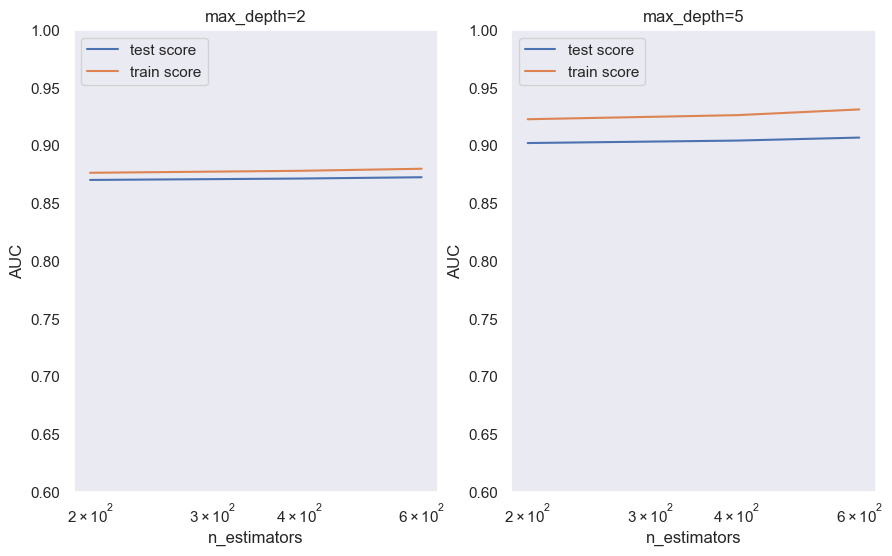

In [181]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [182]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=5)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.2,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.2, n_estimators=200)

In [183]:
# predict on test data
abc_test_predictions = ABC.predict(X_test_pca)

In [184]:
print(confusion_matrix(y_test,abc_test_predictions))
print(accuracy_score(y_test,abc_test_predictions))
print(precision_score(y_test,abc_test_predictions))
print(recall_score(y_test,abc_test_predictions))

[[6895 1339]
 [ 203  567]]
0.8287427809862283
0.2974816369359916
0.7363636363636363


In [185]:
# predict on train data
abc_train_predictions = ABC.predict(X_train_pca)

In [186]:
print(confusion_matrix(y_train,abc_train_predictions))
print(accuracy_score(y_train,abc_train_predictions))
print(precision_score(y_train,abc_train_predictions))
print(recall_score(y_train,abc_train_predictions))

[[16269  2915]
 [ 4053 15131]]
0.8183903252710593
0.8384683586390336
0.7887301918265222


## XGBoost Classifier 

In [187]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=5, n_estimators=200)

# set up GridSearchCV()
xgb_model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs = -1)

In [188]:
# fit the model
xgb_model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, 

In [189]:
# cv results
xgb_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)
xgb_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.553129      0.128754         0.192796        0.005659   
1      32.252071      0.061287         0.170229        0.015061   
2      37.498257      1.060183         0.199142        0.027861   
3      20.142413      0.425350         0.181599        0.033066   
4      29.325172      1.665252         0.165044        0.037250   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.924082   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.928660   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.929643   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.909578   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.930231   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.930334           0.929074         0.927830        0.002700   
1           0.934507           0.932266         0.931811        0.002408   
2           0.935286           0.930979         0.931970        0.002408   
3           0.915494           0.912101         0.912391        0.002424   
4           0.935341           0.931913         0.932495        0.002126   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.971497            0.970444   
1                4            0.977994            0.976396   
2                3            0.978056            0.975548   
3                6            0.983864            0.983217   
4                2            0.996995            0.996646   

   split2_train_score  mean_train_score  std_train_score  
0            0.970856          0.970932         0.000433  
1            0.977800          0.977397         0.000712  
2            0.976447          0.976684         0.001037  
3            0.983839          0.983640         0.000299  
4            0.997129          0.996923         0.000203

In [190]:
# convert parameters to int for plotting on x-axis
xgb_cv_results['param_learning_rate'] = xgb_cv_results['param_learning_rate'].astype('float')
xgb_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.553129      0.128754         0.192796        0.005659   
1      32.252071      0.061287         0.170229        0.015061   
2      37.498257      1.060183         0.199142        0.027861   
3      20.142413      0.425350         0.181599        0.033066   
4      29.325172      1.665252         0.165044        0.037250   

   param_learning_rate param_subsample  \
0                  0.2             0.3   
1                  0.2             0.6   
2                  0.2             0.9   
3                  0.6             0.3   
4                  0.6             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.924082   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.928660   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.929643   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.909578   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.930231   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.930334           0.929074         0.927830        0.002700   
1           0.934507           0.932266         0.931811        0.002408   
2           0.935286           0.930979         0.931970        0.002408   
3           0.915494           0.912101         0.912391        0.002424   
4           0.935341           0.931913         0.932495        0.002126   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.971497            0.970444   
1                4            0.977994            0.976396   
2                3            0.978056            0.975548   
3                6            0.983864            0.983217   
4                2            0.996995            0.996646   

   split2_train_score  mean_train_score  std_train_score  
0            0.970856          0.970932         0.000433  
1            0.977800          0.977397         0.000712  
2            0.976447          0.976684         0.001037  
3            0.983839          0.983640         0.000299  
4            0.997129          0.996923         0.000203

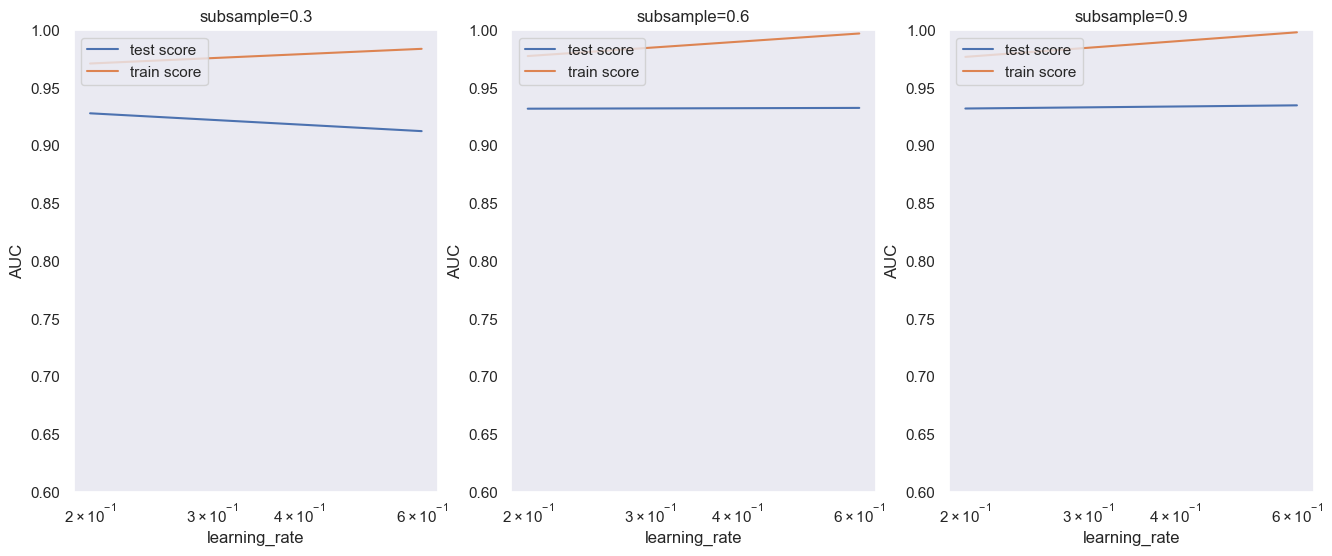

In [191]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = xgb_cv_results[xgb_cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [192]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_optimal = XGBClassifier(params = params)
xgb_model_optimal.fit(X_train_pca, y_train)

[17:46:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [193]:
# predict
xgb_test_predictions = xgb_model_optimal.predict(X_test_pca)

print(confusion_matrix(y_test,xgb_test_predictions))
print(accuracy_score(y_test,xgb_test_predictions))
print(precision_score(y_test,xgb_test_predictions))
print(recall_score(y_test,xgb_test_predictions))

[[7142 1092]
 [ 243  527]]
0.8517325633051976
0.32550957381099443
0.6844155844155844


In [194]:
# predict
xgb_train_predictions = xgb_model_optimal.predict(X_train_pca)

print(confusion_matrix(y_train,xgb_train_predictions))
print(accuracy_score(y_train,xgb_train_predictions))
print(precision_score(y_train,xgb_train_predictions))
print(recall_score(y_train,xgb_train_predictions))

[[17698  1486]
 [ 1451 17733]]
0.9234518348623854
0.9226806805765129
0.9243640533778148


##  Logistic Regression

In [195]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18728.
Date:                Tue, 20 Jun 2023   Deviance:                       37456.
Time:                        17:46:17   Pearson chi2:                 2.53e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3364
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1039      0.013      7.837      0.000       0.078       0.130
aon                                -0.5043      0.014    -36.283      0.000      -0.532      -0.477
days_since_last_rech                1.0356      0.028     37.272      0.000       0.981       1.090
rech_diff_act_good_ph               0.3125      0.025     12.288      0.000       0.263       0.362
rech_amt_diff_act_good_ph          -0.2322      0.031     -7.577      0.000      -0.292      -0.172
onnet_mou_diff_act_good_ph          0.0909      0.058      1.580      0.114      -0.022       0.204
offnet_mou_diff_act_good_ph         0.0866      0.066      1.318      0.187      -0.042       0.215
total_og_mou_diff_act_good_ph      -0.8019      0.086     -9.294      0.000      -0.971      -0.633
total_ic_mou_diff_act_good_ph      -0.4068      0.021    -19.736      0.000      -0.447      -0.366
total_rech_num_diff_act_good_ph    -0.3343      0.022    -15.168      0.000      -0.377      -0.291
max_rech_amt_diff_act_good_ph      -0.1362      0.019     -7.223      0.000      -0.173      -0.099
===================================================================================================
"""

In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features    VIF
6    total_og_mou_diff_act_good_ph  41.72
5      offnet_mou_diff_act_good_ph  23.40
4       onnet_mou_diff_act_good_ph  17.67
3        rech_amt_diff_act_good_ph   3.67
1             days_since_last_rech   2.64
2            rech_diff_act_good_ph   2.49
8  total_rech_num_diff_act_good_ph   1.89
9    max_rech_amt_diff_act_good_ph   1.78
7    total_ic_mou_diff_act_good_ph   1.20
0                              aon   1.04

In [197]:
col = X_train.columns
col=col.drop('offnet_mou_diff_act_good_ph',1)

col

Index(['aon', 'days_since_last_rech', 'rech_diff_act_good_ph',
       'rech_amt_diff_act_good_ph', 'onnet_mou_diff_act_good_ph',
       'total_og_mou_diff_act_good_ph', 'total_ic_mou_diff_act_good_ph',
       'total_rech_num_diff_act_good_ph', 'max_rech_amt_diff_act_good_ph'],
      dtype='object')

In [198]:
# Logistic Regression Model
logm2=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18729.
Date:                Tue, 20 Jun 2023   Deviance:                       37458.
Time:                        17:46:17   Pearson chi2:                 2.31e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3364
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1046      0.013      7.893      0.000       0.079       0.131
aon                                -0.5042      0.014    -36.279      0.000      -0.531      -0.477
days_since_last_rech                1.0360      0.028     37.295      0.000       0.982       1.090
rech_diff_act_good_ph               0.3134      0.025     12.330      0.000       0.264       0.363
rech_amt_diff_act_good_ph          -0.2178      0.028     -7.651      0.000      -0.274      -0.162
onnet_mou_diff_act_good_ph          0.0227      0.025      0.900      0.368      -0.027       0.072
total_og_mou_diff_act_good_ph      -0.6957      0.031    -22.371      0.000      -0.757      -0.635
total_ic_mou_diff_act_good_ph      -0.4094      0.021    -19.937      0.000      -0.450      -0.369
total_rech_num_diff_act_good_ph    -0.3338      0.022    -15.162      0.000      -0.377      -0.291
max_rech_amt_diff_act_good_ph      -0.1400      0.019     -7.529      0.000      -0.176      -0.104
===================================================================================================
"""

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features   VIF
3        rech_amt_diff_act_good_ph  3.34
5    total_og_mou_diff_act_good_ph  3.12
1             days_since_last_rech  2.63
2            rech_diff_act_good_ph  2.48
4       onnet_mou_diff_act_good_ph  1.98
7  total_rech_num_diff_act_good_ph  1.89
8    max_rech_amt_diff_act_good_ph  1.75
6    total_ic_mou_diff_act_good_ph  1.19
0                              aon  1.04

In [200]:
col=col.drop('onnet_mou_diff_act_good_ph',1)

col

Index(['aon', 'days_since_last_rech', 'rech_diff_act_good_ph',
       'rech_amt_diff_act_good_ph', 'total_og_mou_diff_act_good_ph',
       'total_ic_mou_diff_act_good_ph', 'total_rech_num_diff_act_good_ph',
       'max_rech_amt_diff_act_good_ph'],
      dtype='object')

In [201]:
# Logistic Regression Model
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logreg_model=logm3.fit()
logreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18729.
Date:                Tue, 20 Jun 2023   Deviance:                       37459.
Time:                        17:46:18   Pearson chi2:                 2.46e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3363
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1043      0.013      7.875      0.000       0.078       0.130
aon                                -0.5040      0.014    -36.272      0.000      -0.531      -0.477
days_since_last_rech                1.0354      0.028     37.289      0.000       0.981       1.090
rech_diff_act_good_ph               0.3131      0.025     12.322      0.000       0.263       0.363
rech_amt_diff_act_good_ph          -0.2175      0.028     -7.641      0.000      -0.273      -0.162
total_og_mou_diff_act_good_ph      -0.6789      0.025    -27.447      0.000      -0.727      -0.630
total_ic_mou_diff_act_good_ph      -0.4109      0.020    -20.063      0.000      -0.451      -0.371
total_rech_num_diff_act_good_ph    -0.3337      0.022    -15.160      0.000      -0.377      -0.291
max_rech_amt_diff_act_good_ph      -0.1399      0.019     -7.524      0.000      -0.176      -0.103
===================================================================================================
"""

In [202]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features   VIF
3        rech_amt_diff_act_good_ph  3.34
1             days_since_last_rech  2.63
2            rech_diff_act_good_ph  2.48
4    total_og_mou_diff_act_good_ph  2.12
6  total_rech_num_diff_act_good_ph  1.89
7    max_rech_amt_diff_act_good_ph  1.75
5    total_ic_mou_diff_act_good_ph  1.19
0                              aon  1.04

In [203]:
y_logm_train_pred = logreg_model.predict(X_train_sm).values.reshape(-1)

In [204]:
y_logm_train_pred[:10]

array([0.25431167, 0.43142504, 0.14548151, 0.11541961, 0.55279876,
       0.04971977, 0.38060781, 0.16597469, 0.42749246, 0.04098917])

In [205]:
y_logm_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_logm_train_pred})
y_logm_train_pred_final.head()

Churn  Churn_Prob
0      0    0.254312
1      0    0.431425
2      0    0.145482
3      0    0.115420
4      0    0.552799

In [206]:
y_logm_train_pred_final['Churn_predicted'] = y_logm_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_logm_train_pred_final['Churn_Prob%'] = y_logm_train_pred_final.Churn_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%
0      0    0.254312                0        25.43
1      0    0.431425                0        43.14
2      0    0.145482                0        14.55
3      0    0.115420                0        11.54
4      0    0.552799                1        55.28

In [207]:
# Confusion Matrix
logm_confusion = metrics.confusion_matrix(y_logm_train_pred_final.Churn,y_logm_train_pred_final.Churn_predicted)
print(logm_confusion)

[[15633  3551]
 [ 4302 14882]]


In [208]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_logm_train_pred_final.Churn,y_logm_train_pred_final.Churn_predicted))

0.7953242285237698


In [209]:
TN=logm_confusion[0,0]
FP=logm_confusion[0,1]
FN=logm_confusion[1,0]
TP=logm_confusion[1,1]

In [210]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 77.58 %


In [211]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 81.49 %


In [212]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 18.51 %


In [213]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 22.42 %


In [214]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 80.74 %


In [215]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 78.42 %


In [216]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 79.53 %


In [217]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [218]:
fpr, tpr, thresholds = metrics.roc_curve( y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob, drop_intermediate = False )

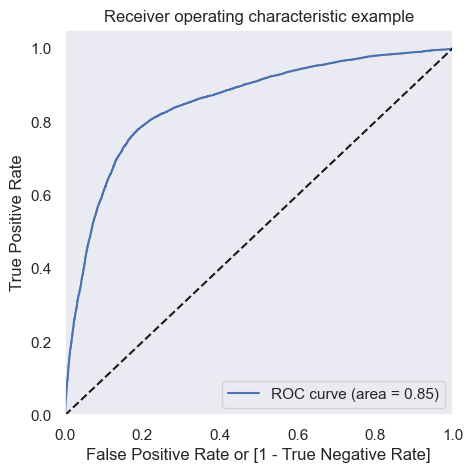

In [219]:
draw_roc(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob)

In [220]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
numbers.append(0.45)
for i in numbers:
    y_logm_train_pred_final[i]= y_logm_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%  0.0  0.1  0.2  0.3  0.4  \
0      0    0.254312                0        25.43    1    1    1    0    0   
1      0    0.431425                0        43.14    1    1    1    1    1   
2      0    0.145482                0        14.55    1    1    0    0    0   
3      0    0.115420                0        11.54    1    1    0    0    0   
4      0    0.552799                1        55.28    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  0.45  
0    0    0    0    0    0     0  
1    0    0    0    0    0     0  
2    0    0    0    0    0     0  
3    0    0    0    0    0     0  
4    1    0    0    0    0     1

In [221]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.45,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_logm_train_pred_final.Churn, y_logm_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.500000  1.000000  0.000000
0.10  0.10  0.562318  0.985874  0.138761
0.20  0.20  0.657188  0.950636  0.363741
0.30  0.30  0.728107  0.892150  0.564064
0.40  0.40  0.777940  0.839606  0.716274
0.45  0.45  0.790998  0.809946  0.772050
0.50  0.50  0.795324  0.775751  0.814898
0.60  0.60  0.775907  0.676293  0.875521
0.70  0.70  0.736030  0.552440  0.919621
0.80  0.80  0.674416  0.396372  0.952460
0.90  0.90  0.607746  0.236603  0.978889


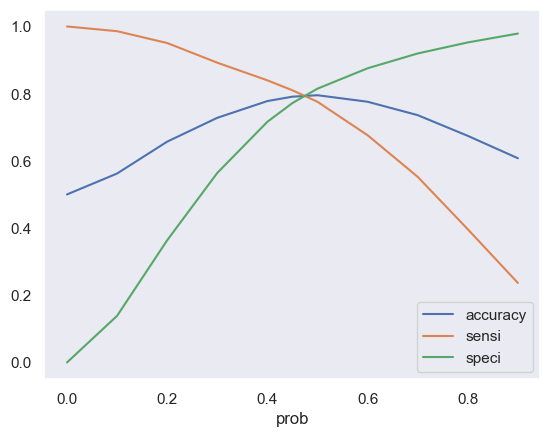

In [222]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [223]:
y_logm_train_pred_final['Churn_final_predicted'] = y_logm_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_logm_train_pred_final.head()

Churn  Churn_Prob  Churn_predicted  Churn_Prob%  0.0  0.1  0.2  0.3  0.4  \
0      0    0.254312                0        25.43    1    1    1    0    0   
1      0    0.431425                0        43.14    1    1    1    1    1   
2      0    0.145482                0        14.55    1    1    0    0    0   
3      0    0.115420                0        11.54    1    1    0    0    0   
4      0    0.552799                1        55.28    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  0.45  Churn_final_predicted  
0    0    0    0    0    0     0                      0  
1    0    0    0    0    0     0                      0  
2    0    0    0    0    0     0                      0  
3    0    0    0    0    0     0                      0  
4    1    0    0    0    0     1                      1

In [224]:
print("Precision Score of the Model:",round(100*(precision_score(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_final_predicted)),2),"%")

Precision Score of the Model: 80.74 %


In [225]:
print("Recall Score of the Model:",round(100*(recall_score(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_final_predicted)),2),"%")

Recall Score of the Model: 77.58 %


In [226]:
p, r, thresholds = precision_recall_curve(y_logm_train_pred_final.Churn, y_logm_train_pred_final.Churn_Prob)

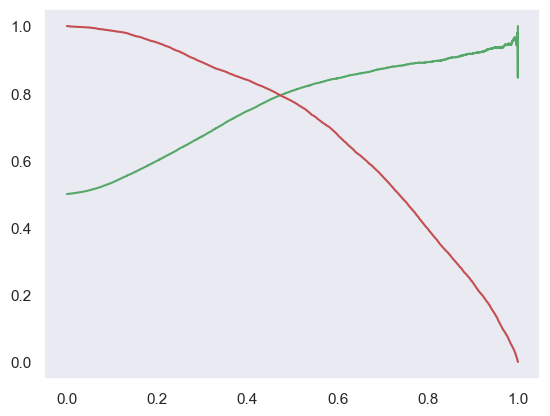

In [227]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [228]:
X_test = X_test[col]
X_test.head()

aon  days_since_last_rech  rech_diff_act_good_ph  \
29360 -0.606319              2.664068              -4.463699   
49979 -0.281705             -0.274664               0.273836   
90612  2.232119             -0.366499               0.273836   
87007  1.607264             -0.733840               0.273836   
91852 -0.573082             -0.642005               0.273836   

       rech_amt_diff_act_good_ph  total_og_mou_diff_act_good_ph  \
29360                  -0.912302                      -1.547278   
49979                  -0.384111                      -1.622170   
90612                   0.876152                       0.474858   
87007                   0.395499                       0.252688   
91852                   0.438810                      -0.104275   

       total_ic_mou_diff_act_good_ph  total_rech_num_diff_act_good_ph  \
29360                       0.057435                        -1.896607   
49979                      -0.797704                         0.174274   
90612                       0.391108                         0.550798   
87007                      -0.045119                         1.115584   
91852                      -0.075960                         0.174274   

       max_rech_amt_diff_act_good_ph  
29360                      -0.504735  
49979                       0.616864  
90612                       0.272277  
87007                       0.150657  
91852                       0.252007

In [229]:
X_test_sm = sm.add_constant(X_test)

In [230]:
y_logm_test_pred = logreg_model.predict(X_test_sm)

In [231]:
y_logm_test_pred[:10]

29360    0.975859
49979    0.804652
90612    0.098859
87007    0.117923
91852    0.432237
28100    0.106502
69301    0.553211
50905    0.588622
31097    0.300887
83157    0.868877
dtype: float64

In [232]:
y_logm_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_logm_test_pred})
y_logm_test_pred_final.head()

Churn  Churn_Prob
29360      0    0.975859
49979      0    0.804652
90612      0    0.098859
87007      0    0.117923
91852      0    0.432237

In [233]:
y_logm_test_pred_final['Churn_predicted'] = y_logm_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_logm_test_pred_final.head()

Churn  Churn_Prob  Churn_predicted
29360      0    0.975859                1
49979      0    0.804652                1
90612      0    0.098859                0
87007      0    0.117923                0
91852      0    0.432237                0

In [234]:
# Confusion Matrix
logm_test_confusion = metrics.confusion_matrix(y_logm_test_pred_final.Churn,y_logm_test_pred_final.Churn_predicted)
print(logm_test_confusion)

[[6692 1542]
 [ 190  580]]


In [235]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_logm_test_pred_final.Churn,y_logm_test_pred_final.Churn_predicted))

0.8076410484229232


In [236]:
TN=logm_test_confusion[0,0]
FP=logm_test_confusion[0,1]
FN=logm_test_confusion[1,0]
TP=logm_test_confusion[1,1]

In [237]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 75.32 %


In [238]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 81.27 %


In [239]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 18.73 %


In [240]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 24.68 %


In [241]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 27.33 %


In [242]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 97.24 %


In [243]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 80.76 %


In [244]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_logm_test_pred_final.Churn, y_logm_test_pred_final.Churn_predicted)),2),"%")

Precision Score of the Test Data Predictions: 27.33 %


In [245]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_logm_test_pred_final.Churn, y_logm_test_pred_final.Churn_predicted)),2),"%")

Recall Score of the Test Data Predictions: 75.32 %


In [246]:
print("Accuracy Score of the Test Data Predictions:",round(100*(accuracy_score(y_logm_test_pred_final.Churn, y_logm_test_pred_final.Churn_predicted)),2),"%")

Accuracy Score of the Test Data Predictions: 80.76 %
